<a href="https://colab.research.google.com/github/Nadia01cg-bit/Data-Analytics/blob/main/Water_potability_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Context**

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.



#DATA UNDERSTANDING

*   mengumpulkan data : sumbernya dari mana saja. bisa dari data yang tersedia, mencari data diluar ataupun data tambahan
*   indikator mana yang kelihatannya bisa  dan tidak bisa digunakan
*   apakah datanya cukup untuk dilakukan analisis dan bisa digeneralisasikan dan dibuat prediksi serta sudah mencukupi untuk menjawab permasalahan bisnis
*   apakah terdapat missing value


*   jumlah data
*   jenis data
*   pengkodean (jika memang ada data kualitatif)



##Data dictionary

> **Berikut ini merupakan penjelasan dari masing-masing kolom dari data yang akan digunakan :**



***1. pH value:***
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.


***2. Hardness:***
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.


***3. Solids (Total dissolved solids - TDS):***
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.


***4. Chloramines:***
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.


***5. Sulfate:***
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.


***6. Conductivity:***
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.


***7. Organic_carbon:***
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.


***8. Trihalomethanes:***
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.


***9. Turbidity:***
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.


***10. Potability:***
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.






##Import libraries

In [ ]:
import math
from collections import Counter, defaultdict
from functools import partial
from pprint import pprint

import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score,recall_score,accuracy_score

plt.style.use("fivethirtyeight")

##Import data

In [ ]:
df=pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


##Info data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


> terdapat 10 kolom dan 3276 baris data dengan seluruh tipe datanya adalah numerik. masih terdapat data missing

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

> Masih terdapat data missing pada kolom, ph, sulfate dan trihalomathanes. missing terbanyak yaitu kolom sulfate, dengan jumlah sebanyak 781.

#DATA PREPARATION


*   menggabungkan data (jika data yang diperoeh berasal dari berbagai sumber)
*   memilih subset sampel data : baris dan kolom


*   menyortir data untuk pemodelan
*   menghapus/mengganti missing value atau masalah lain seperti ketidak konsistenan pengkodean pada data kualitatif


*   membuat data baru yang sudah dilakukan langkah-langkah diatas
*   membagi data train dan data uji







##Pemisahan data kategorik dan numerik

In [ ]:
numerical_features = df.select_dtypes(include="number").columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
print("Categorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']
Categorical features:
[]


> dari hasil diatas terlihat bahwa seluruh variabel pada data quality water merupakan data numerik. padahal sebenarnya variabel potability adalah variabel nominal/kategorik yang hanya memiliki 2 nilai, yaitu 0=tidak dan 1=ya. tetapi, karena data potability dari sumbernya sudah dikodekan (berbentuk angka), maka pyton menganggap bahwa data tersebut termasuk numerical.

In [ ]:
numerical_features = df.select_dtypes(include="float64").columns.tolist()
categorical_features = df.select_dtypes(include="int64").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
print("Categorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']
Categorical features:
['Potability']


##Summary Statistics

In [ ]:
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.080795,1.469956,0.000000,6.277673,7.080795,7.870050,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.0,333.775777,36.142612,129.000000,317.094638,333.775777,350.385756,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.0,63.463109,20.349923,0.738000,53.793688,65.445962,76.666609,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


> 
* variabel hardness memiliki rentang yang cukup jauh antara Q1-Q3 dengan nilai maksimum dan minimumnya. hal ini bisa jadi karena banyaknya outlier pada data variabel tersebut.

* namun aecara keseluruhan, tidak ada hal aneh yang ditemukan pada dataset ini.


##Visualisasi

###1)Boxplot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


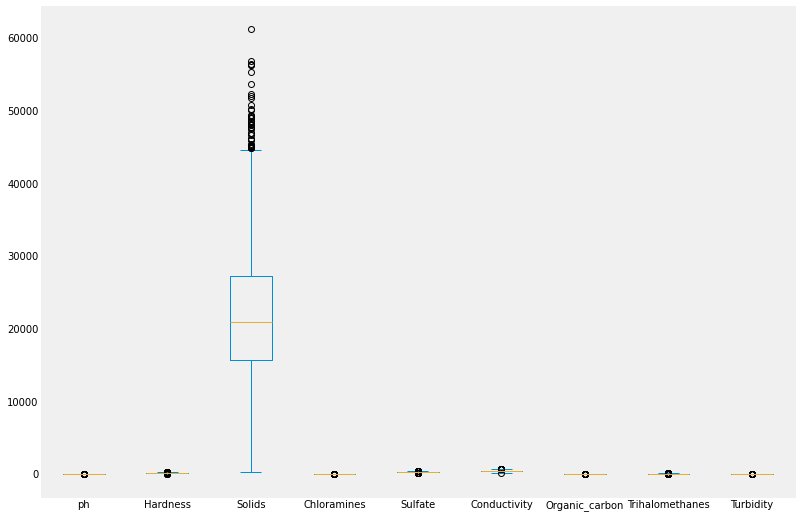

In [ ]:
df[numerical_features].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

> Dari plot tersebut terlihat bahwa, masing-masing variabel memiliki rentang angka yang berbeda-beda, terutama variabel solid, sehingga tidak cocok jika plot digabungkan dalam satu frame.

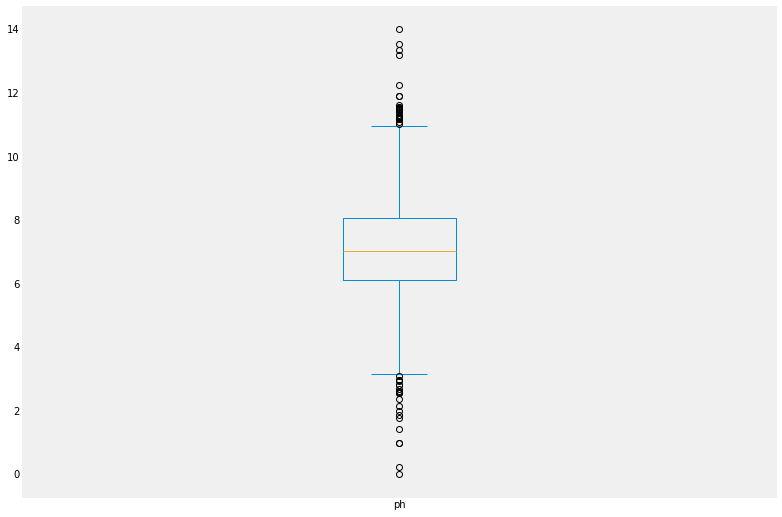

In [ ]:
df['ph'].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

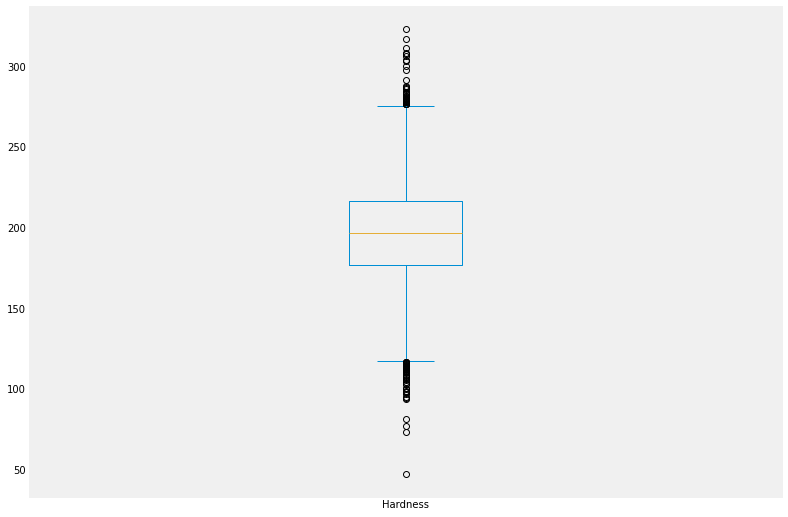

In [ ]:
df['Hardness'].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

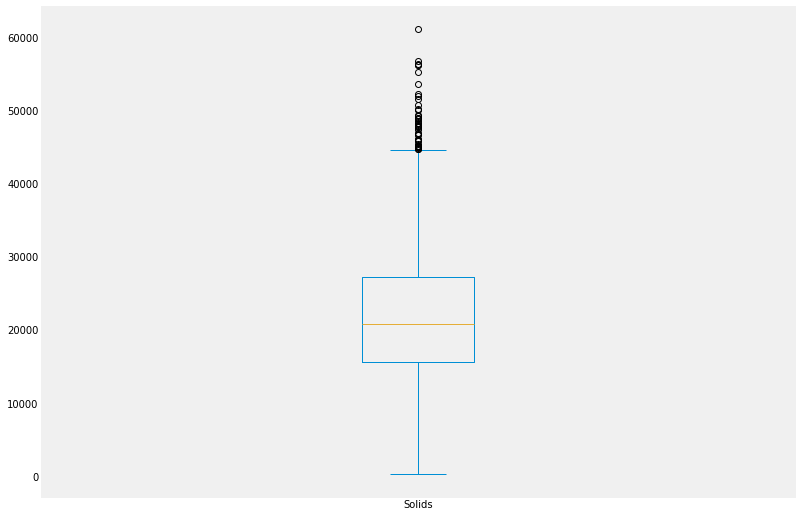

In [ ]:
df['Solids'].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

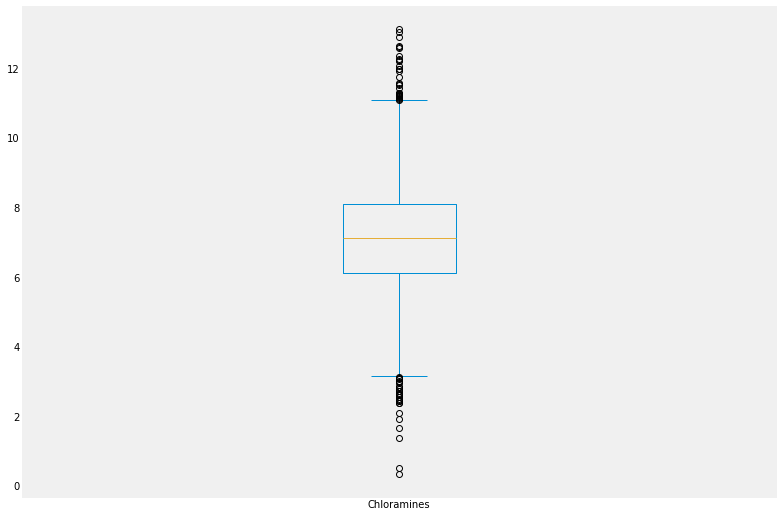

In [ ]:
df['Chloramines'].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

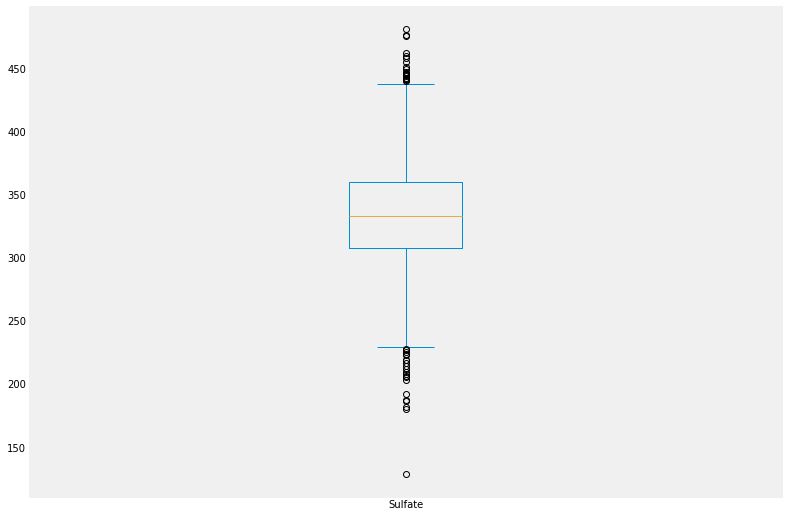

In [ ]:
df['Sulfate'].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

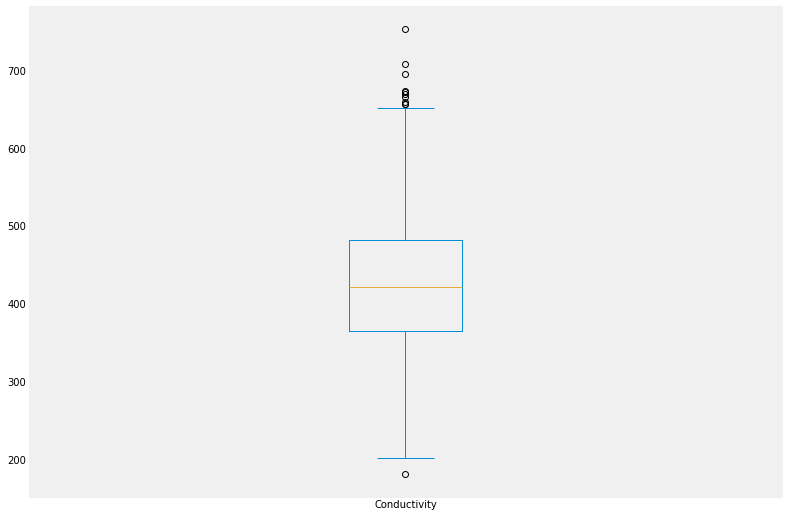

In [ ]:
df['Conductivity'].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

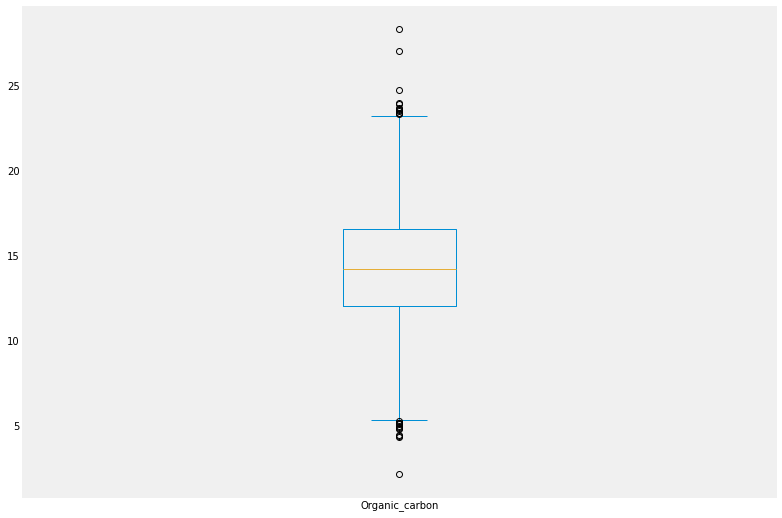

In [ ]:
df['Organic_carbon'].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

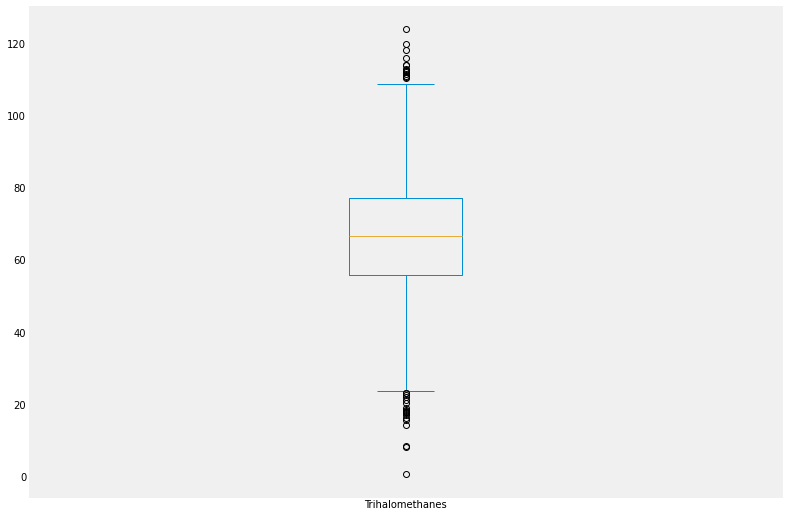

In [ ]:
df['Trihalomethanes'].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

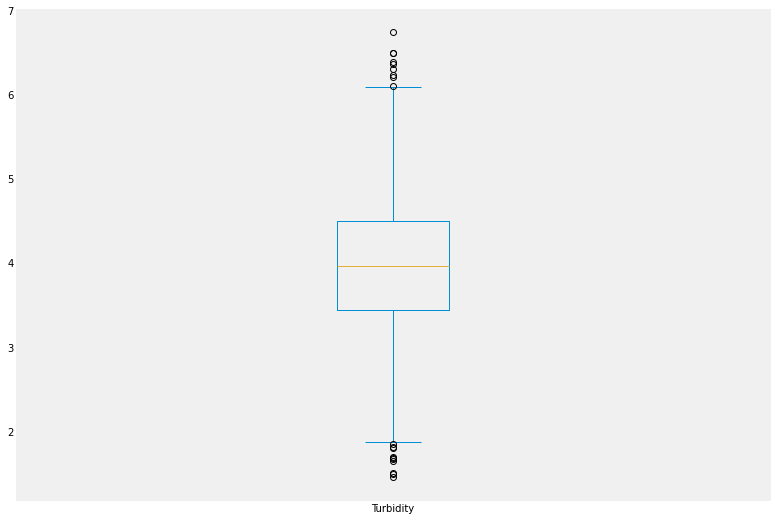

In [ ]:
df['Turbidity'].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

> dari masing-masing plot diatas, dapat kita gabungkan dalam satu tampilan sebagai berikut :

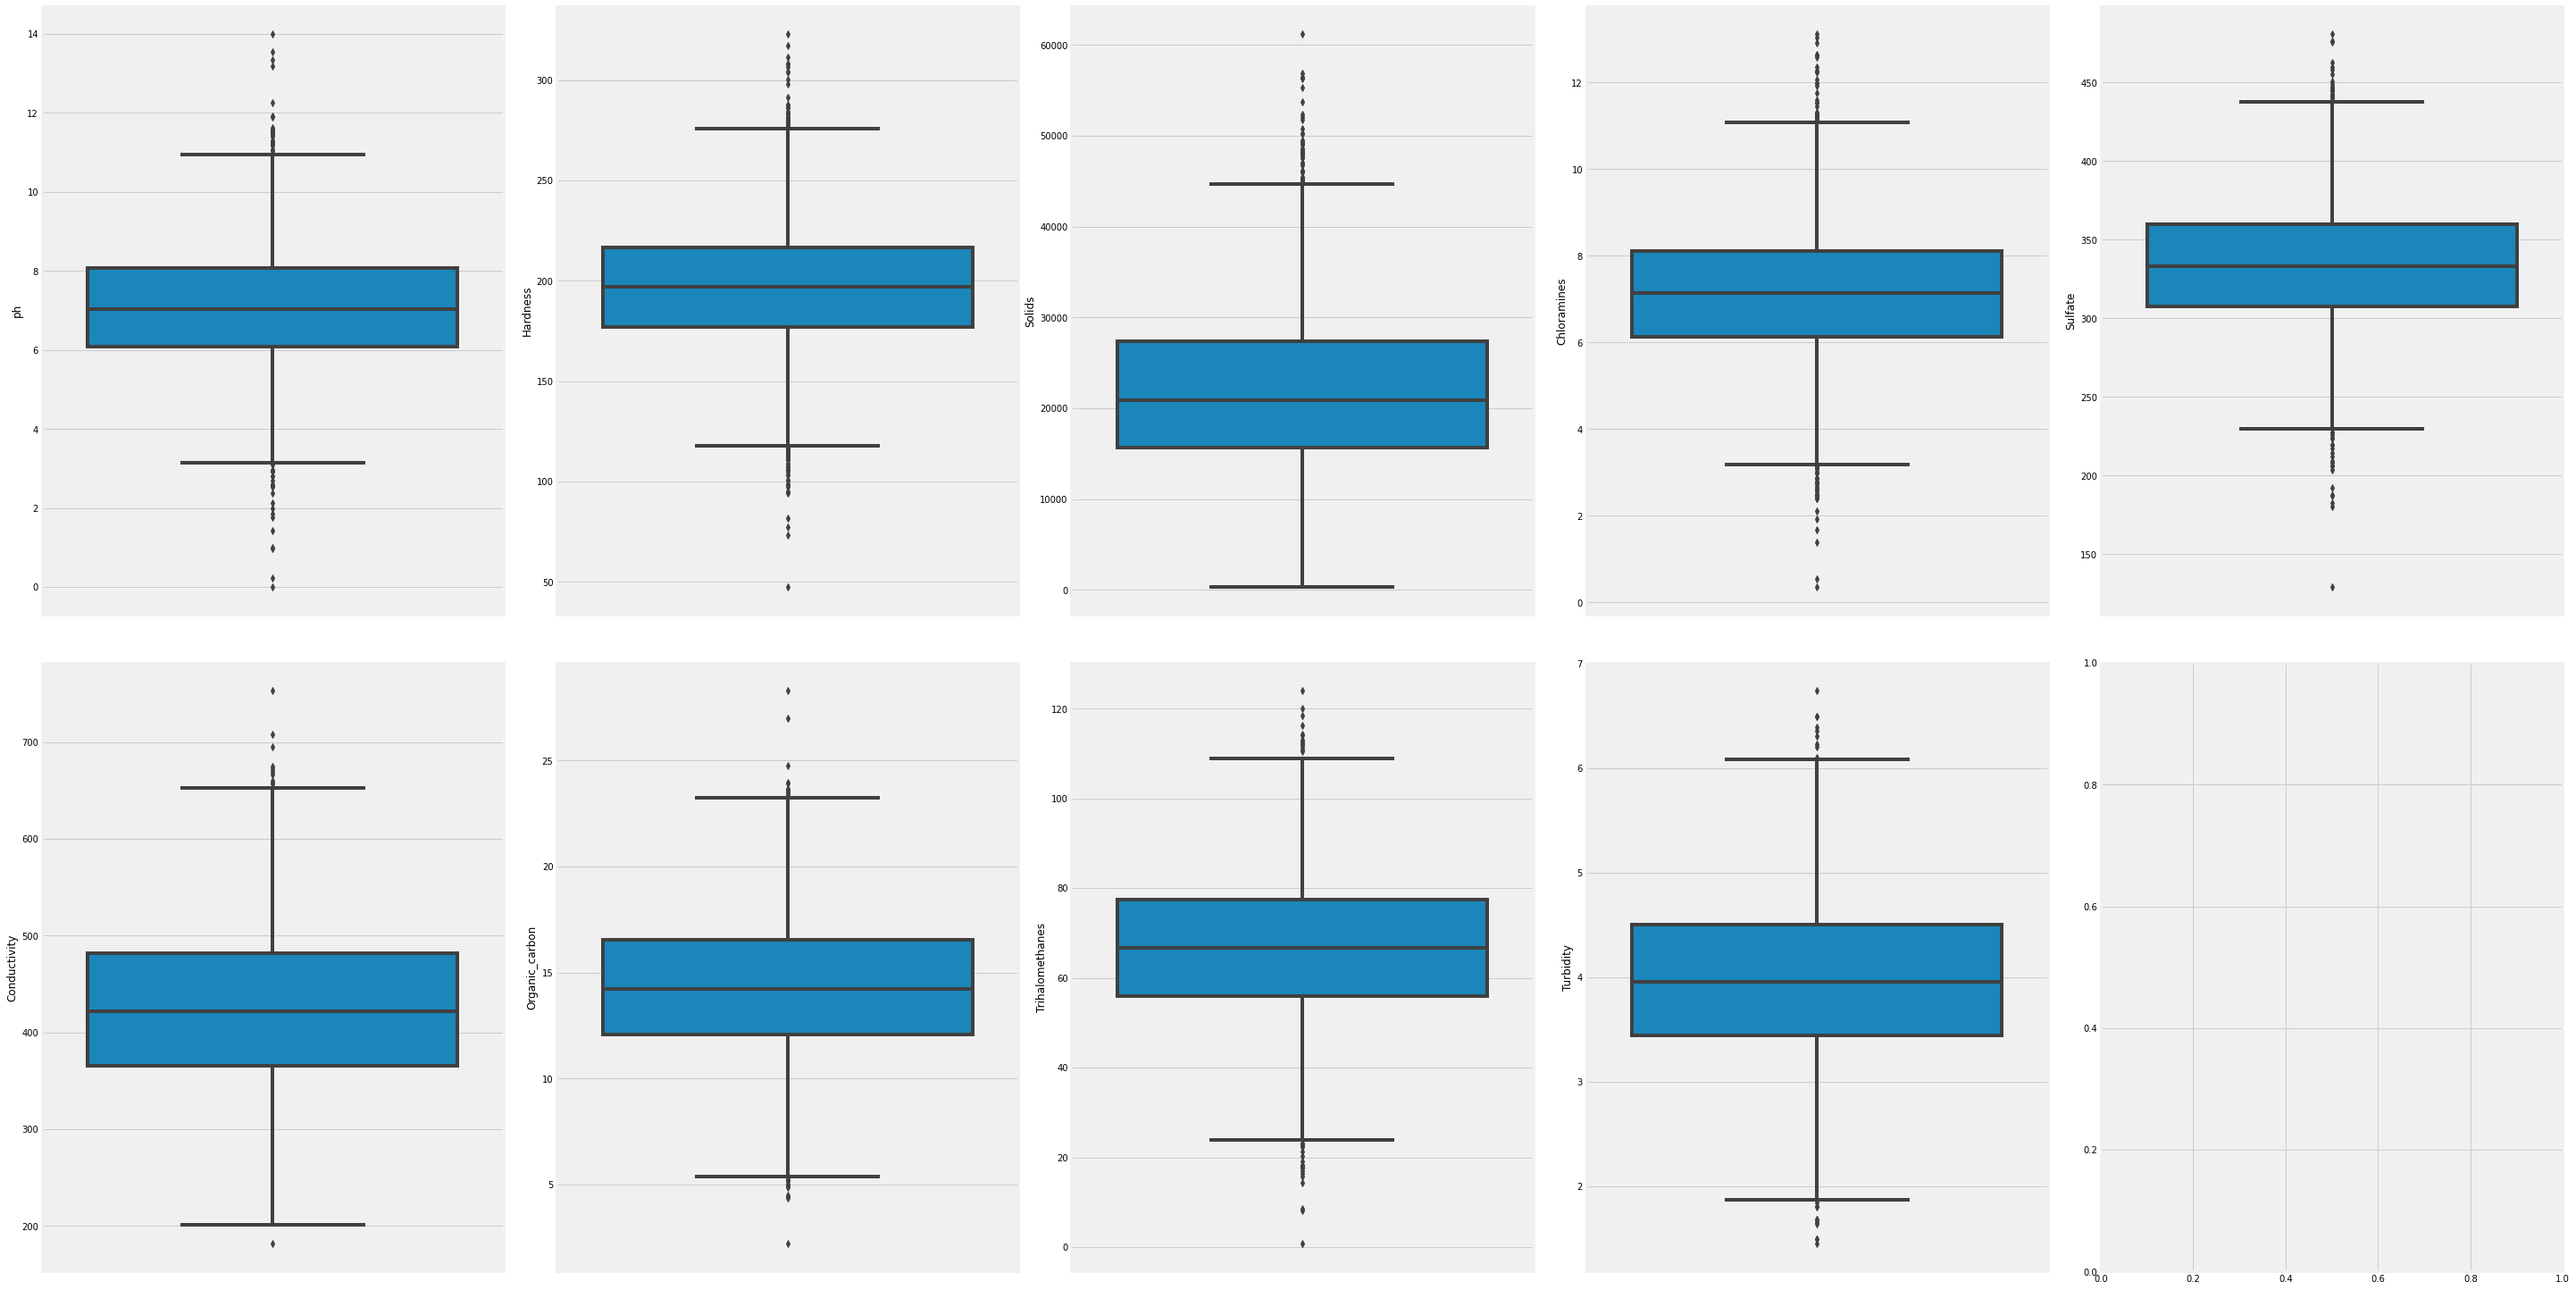

In [ ]:
fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (40, 20))
index = 0
ax = ax.flatten()

for col, value in df[numerical_features].items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

> dari plot pada masing-masing variabel, diperoleh bahwa :


*   terjadi outlier pada masing-masing variabel
*   terdapat beberapa variabel yang mengalami skewed right, seperti solids, conductivity, organic carbon

> dapat juga digunakan violin plot untuk mengetahui bentuk kurva

###2) violin plot

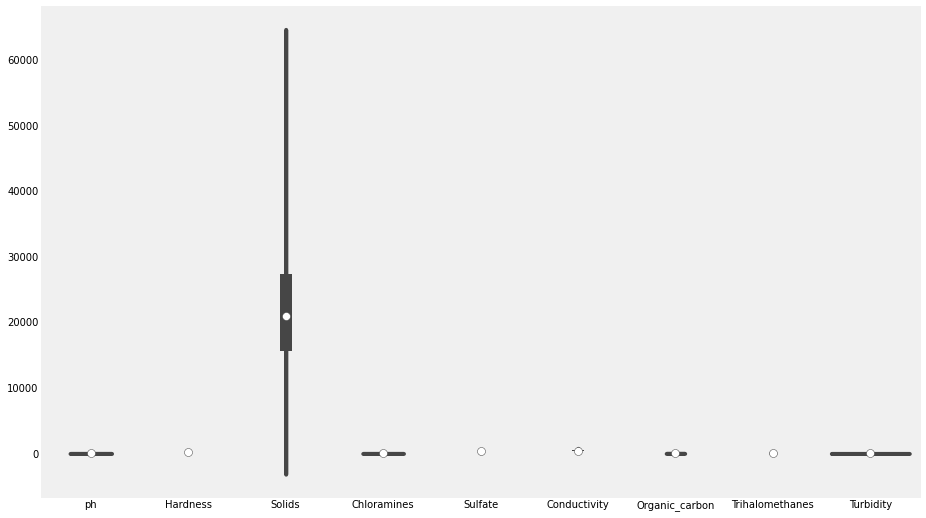

In [ ]:
plt.figure(figsize=(14,9))
sns.violinplot(data=df[numerical_features])
plt.grid(False)
plt.show()

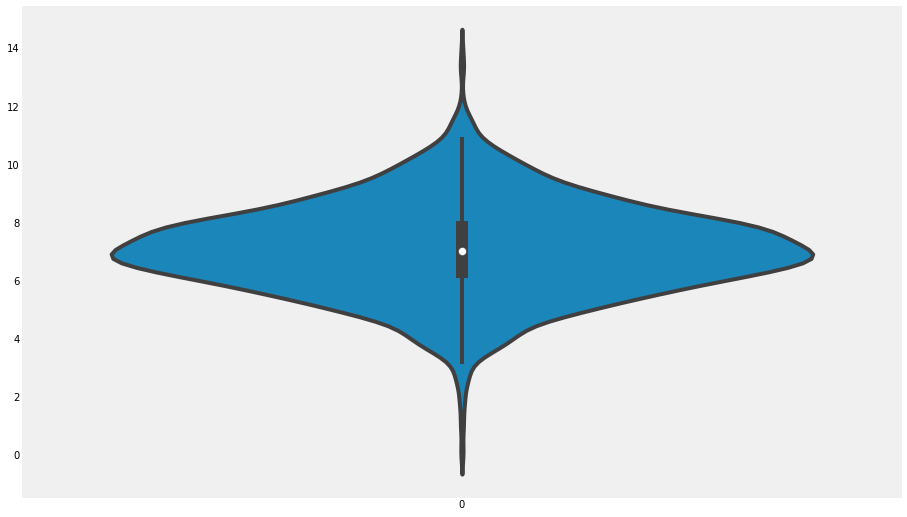

In [ ]:
plt.figure(figsize=(14,9))
sns.violinplot(data=df['ph'])
plt.grid(False)
plt.show()

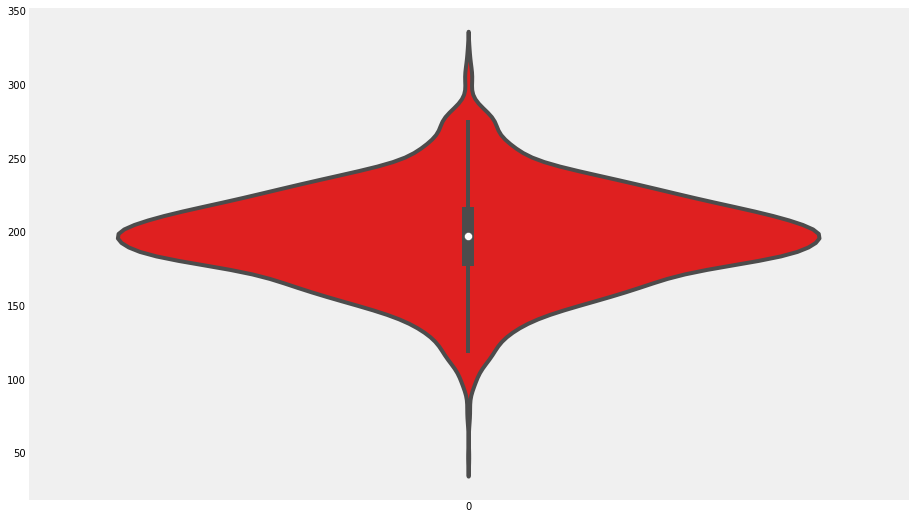

In [ ]:
plt.figure(figsize=(14,9))
sns.violinplot(data=df['Hardness'],color='red')
plt.grid(False)
plt.show()

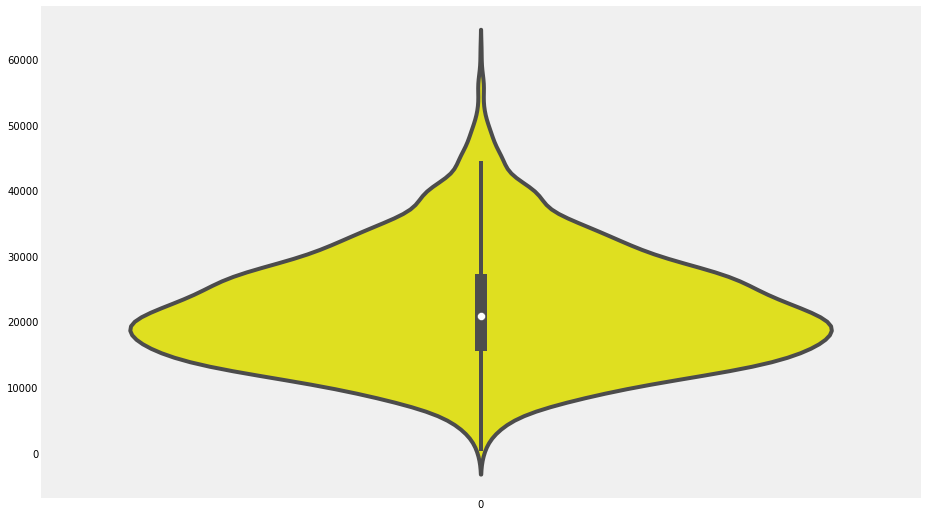

In [ ]:
plt.figure(figsize=(14,9))
sns.violinplot(data=df['Solids'],color='yellow')
plt.grid(False)
plt.show()

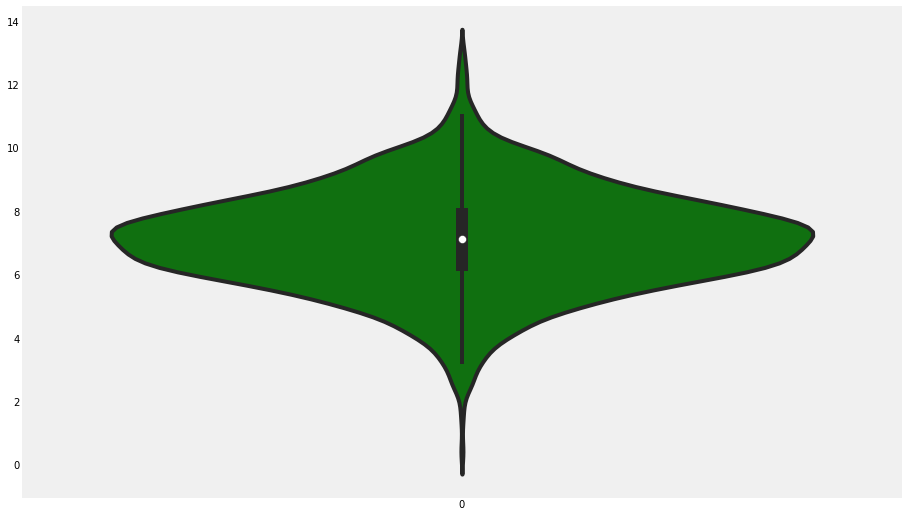

In [ ]:
plt.figure(figsize=(14,9))
sns.violinplot(data=df['Chloramines'],color='green')
plt.grid(False)
plt.show()

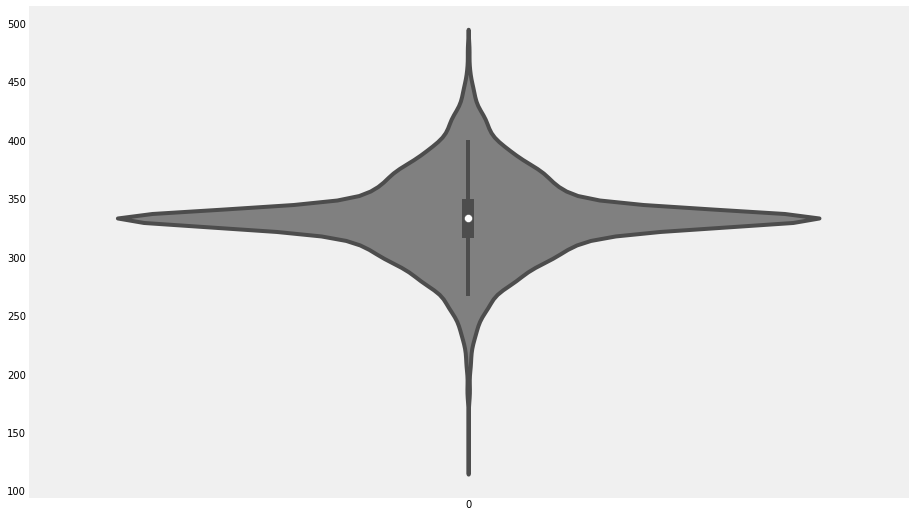

In [ ]:
plt.figure(figsize=(14,9))
sns.violinplot(data=df['Sulfate'],color='grey')
plt.grid(False)
plt.show()

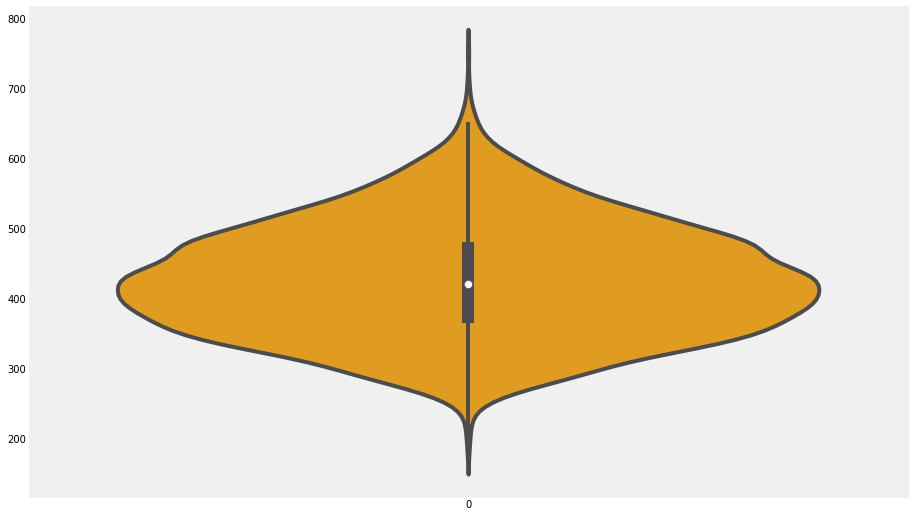

In [ ]:
plt.figure(figsize=(14,9))
sns.violinplot(data=df['Conductivity'],color='orange')
plt.grid(False)
plt.show()

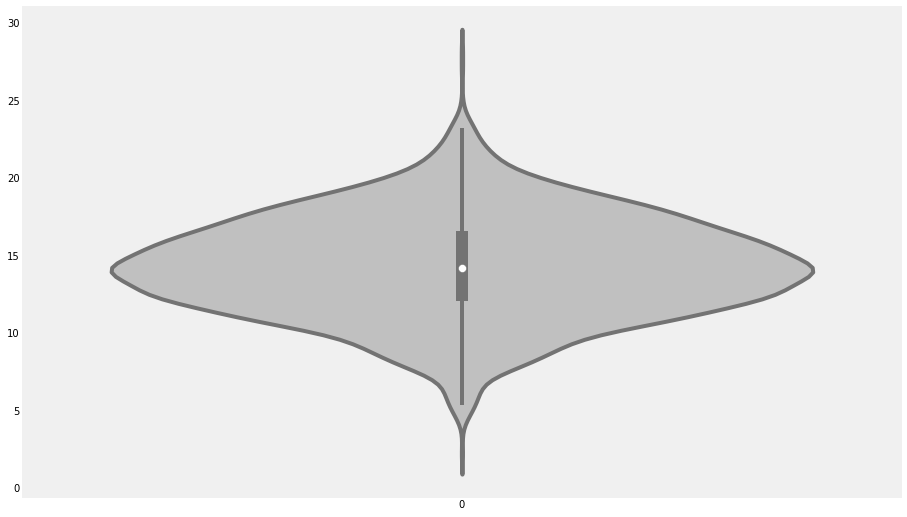

In [ ]:
plt.figure(figsize=(14,9))
sns.violinplot(data=df['Organic_carbon'],color='silver')
plt.grid(False)
plt.show()

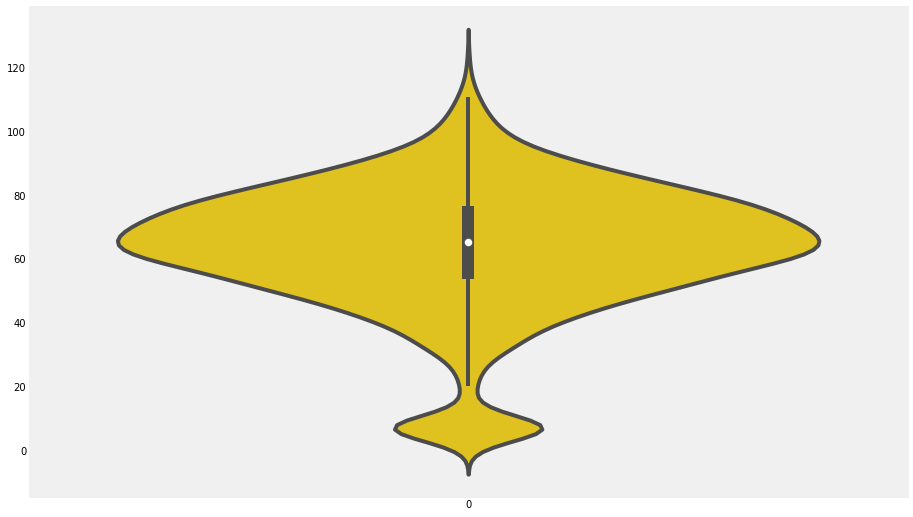

In [ ]:
plt.figure(figsize=(14,9))
sns.violinplot(data=df['Trihalomethanes'],color='gold')
plt.grid(False)
plt.show()

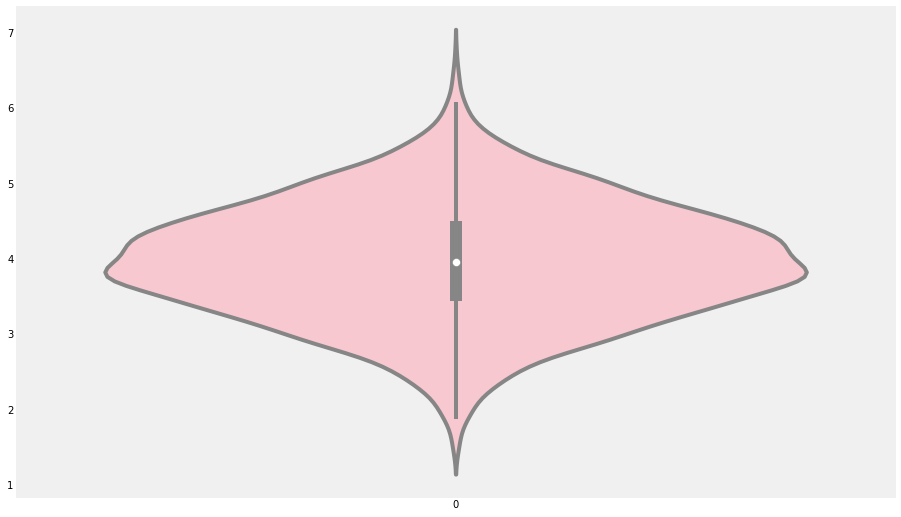

In [ ]:
plt.figure(figsize=(14,9))
sns.violinplot(data=df['Turbidity'],color='pink')
plt.grid(False)
plt.show()

> secara keseluruhan, kepadatan masing-masing variabel hampir sama yaitu datanya tidak terlalu padat.
> secara keseluruhan bentuk distribusinya (persebaran datanya) mulus, kecuali pada variabel sulfate dan trihalomethanes.

###3)Histogram

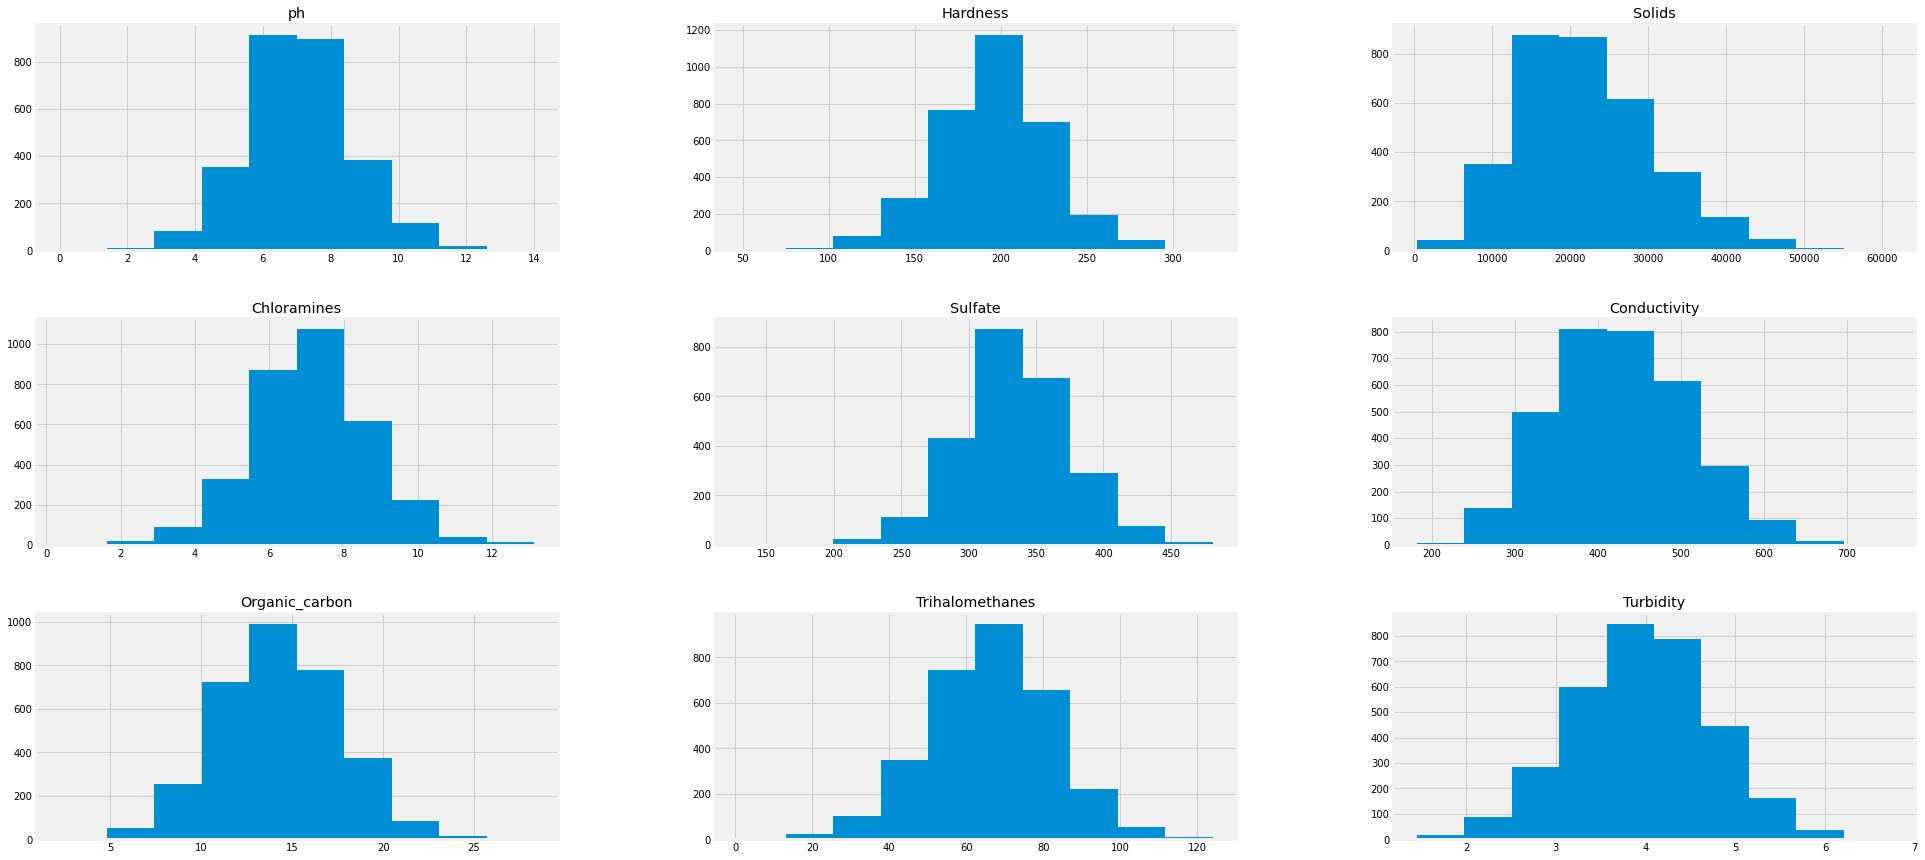

In [ ]:
plt.rcParams['figure.figsize'] = [30,15]
df[numerical_features].hist()
plt.show()

####3.1) ph berdasarkan potability

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98f1a1fed0>,
      dtype=object)

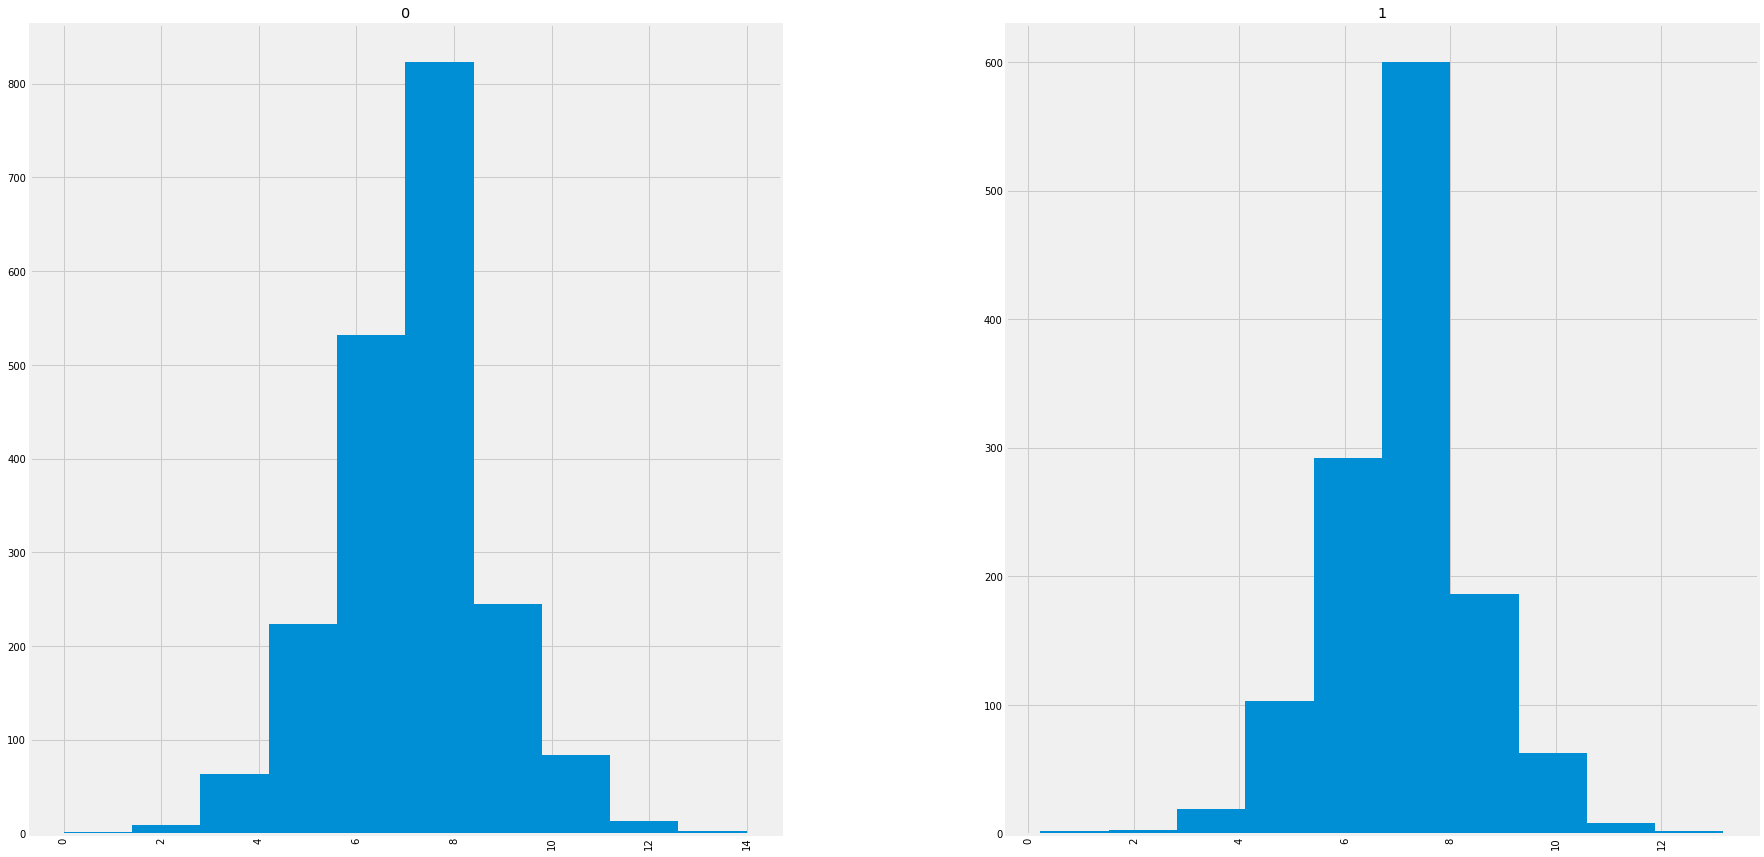

In [ ]:
df.hist(column='ph', by='Potability')

####3.2) hardness berdasarkan potability

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98f297d590>,
      dtype=object)

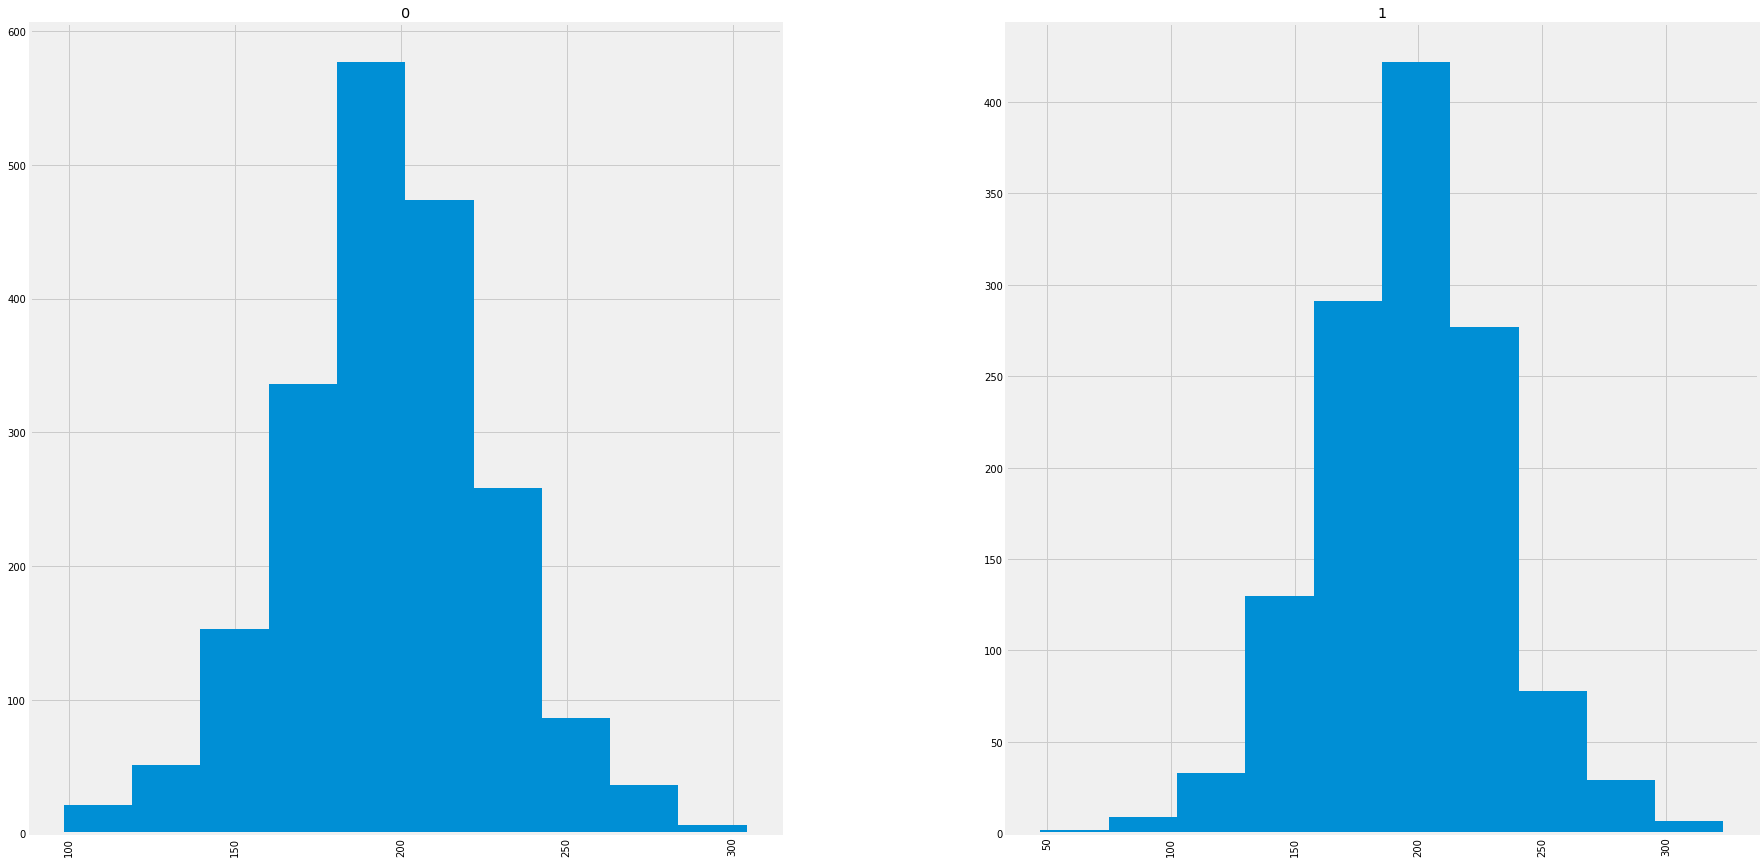

In [ ]:
df.hist(column='Hardness', by='Potability')

####3.3) Solids berdasarkan potability

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98f18ae650>,
      dtype=object)

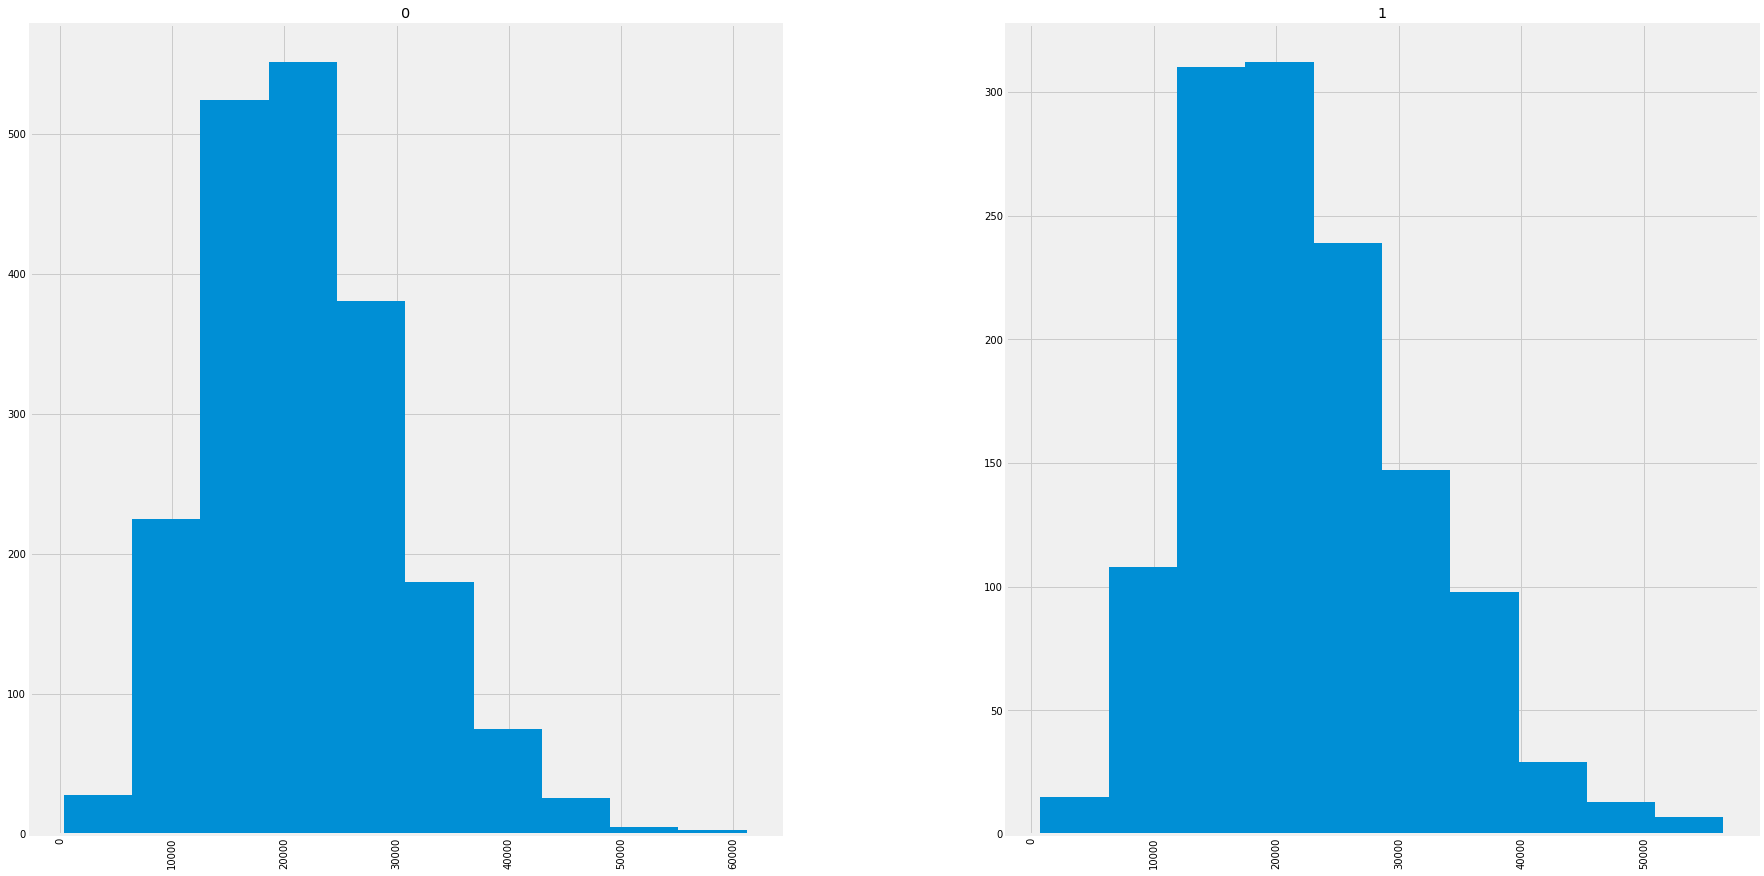

In [ ]:
df.hist(column='Solids', by='Potability')

####3.4)Chloramines berdasarkan potability

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98f1d57cd0>,
      dtype=object)

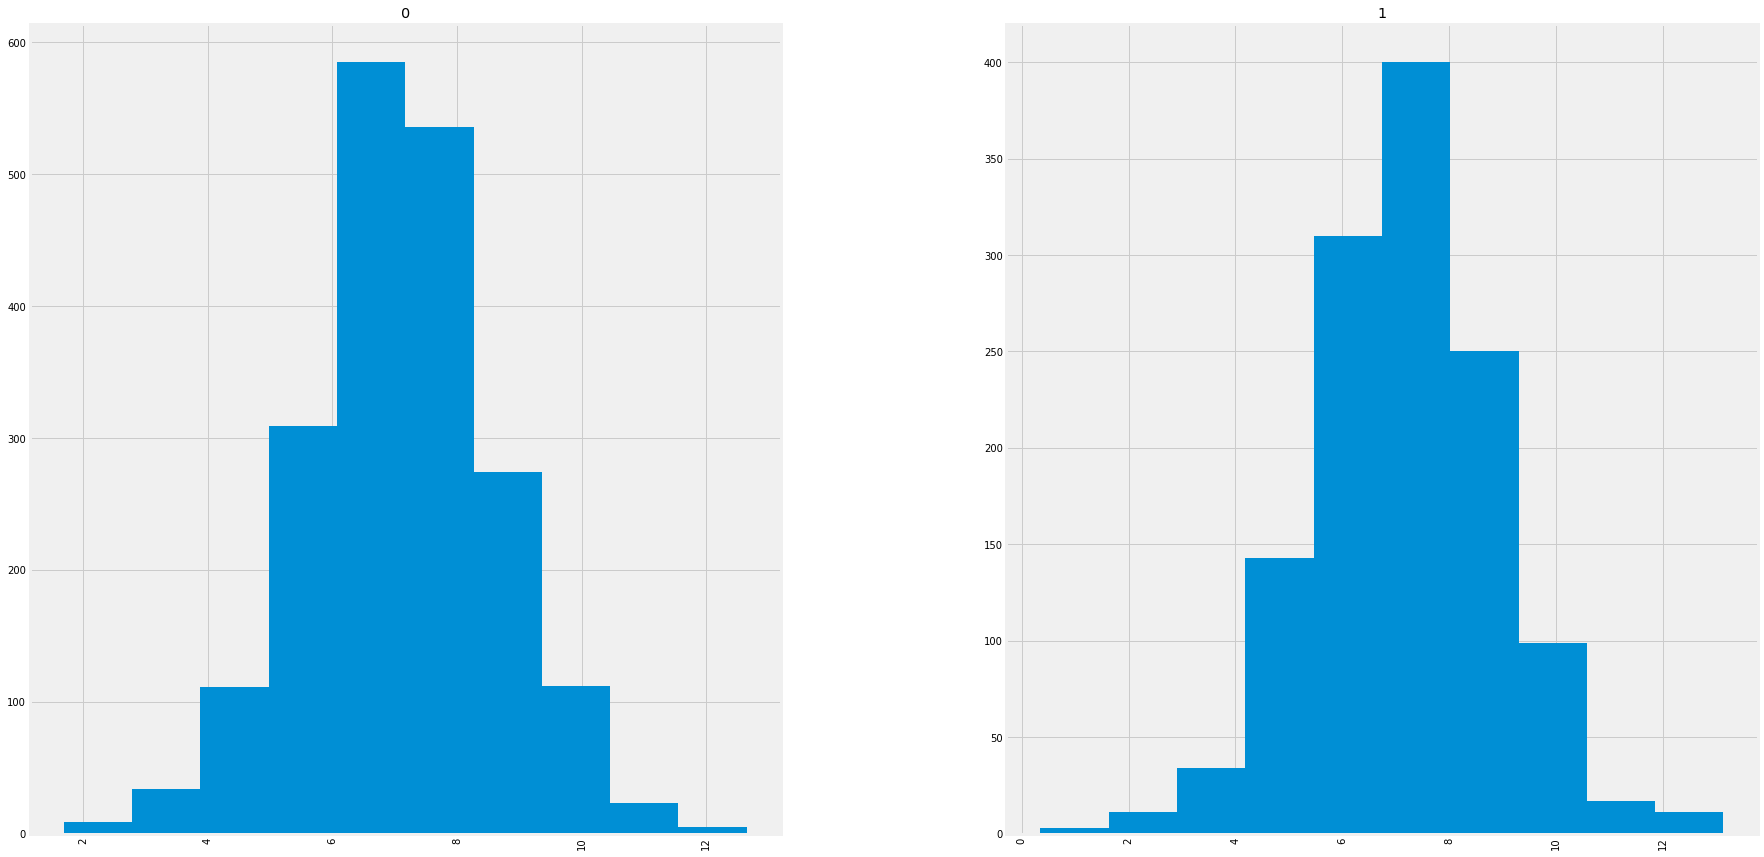

In [ ]:
df.hist(column='Chloramines', by='Potability')

####3.5) Sulfate berdasrkan Potability

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98f2bc4410>,
      dtype=object)

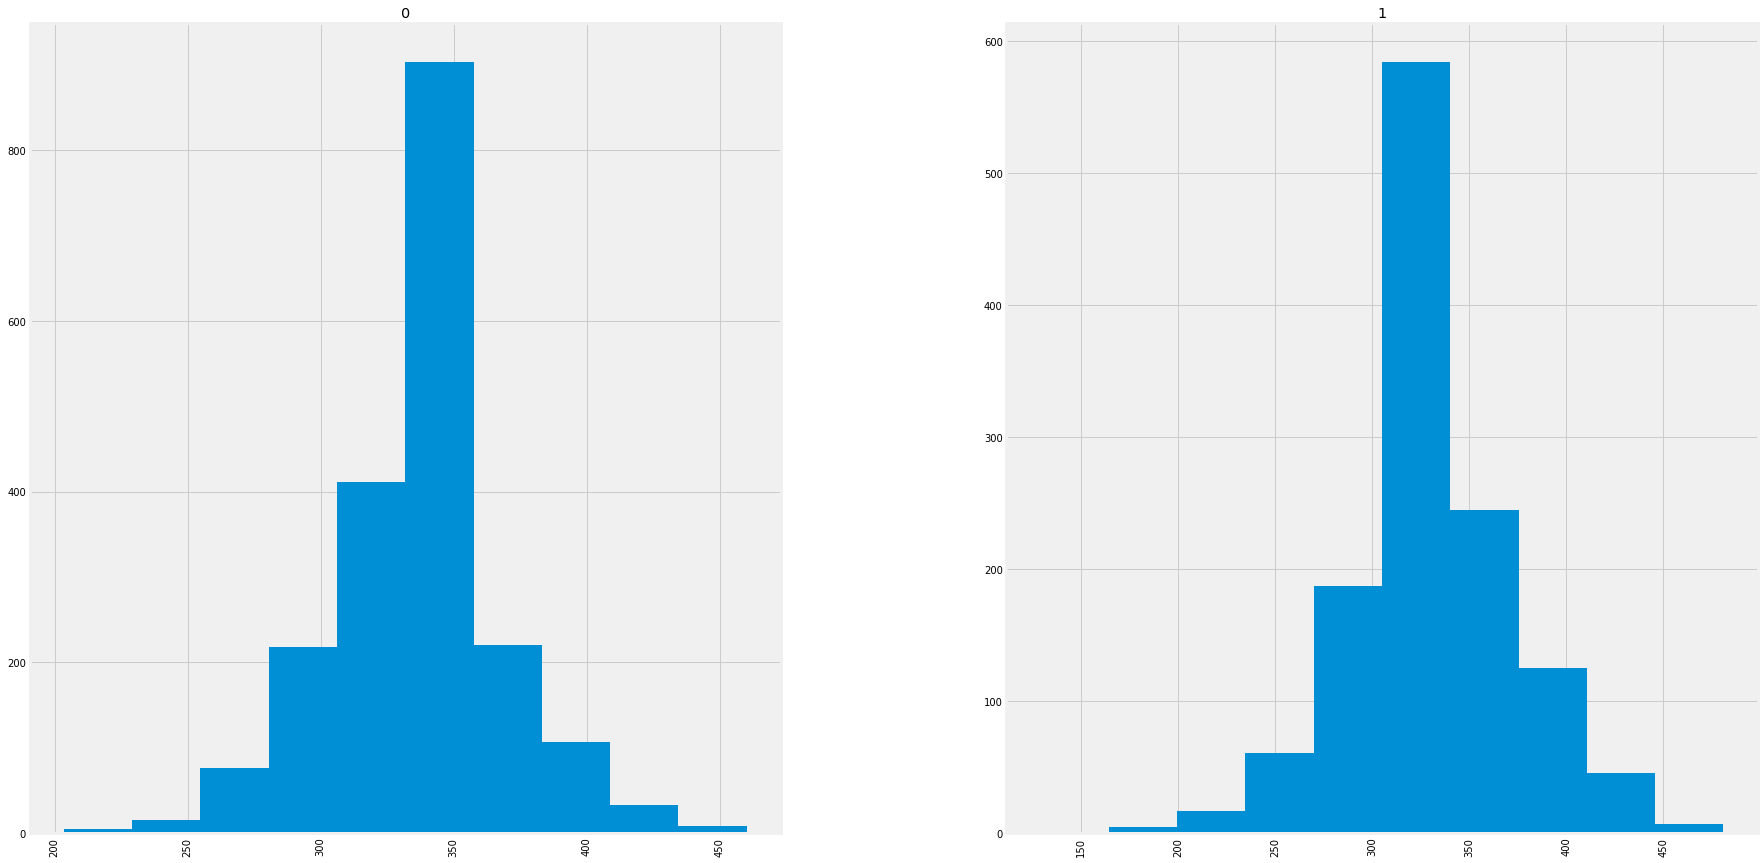

In [ ]:
df.hist(column='Sulfate', by='Potability')

####3.6) Conductivity berdasarkan potability

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98f2bdc750>,
      dtype=object)

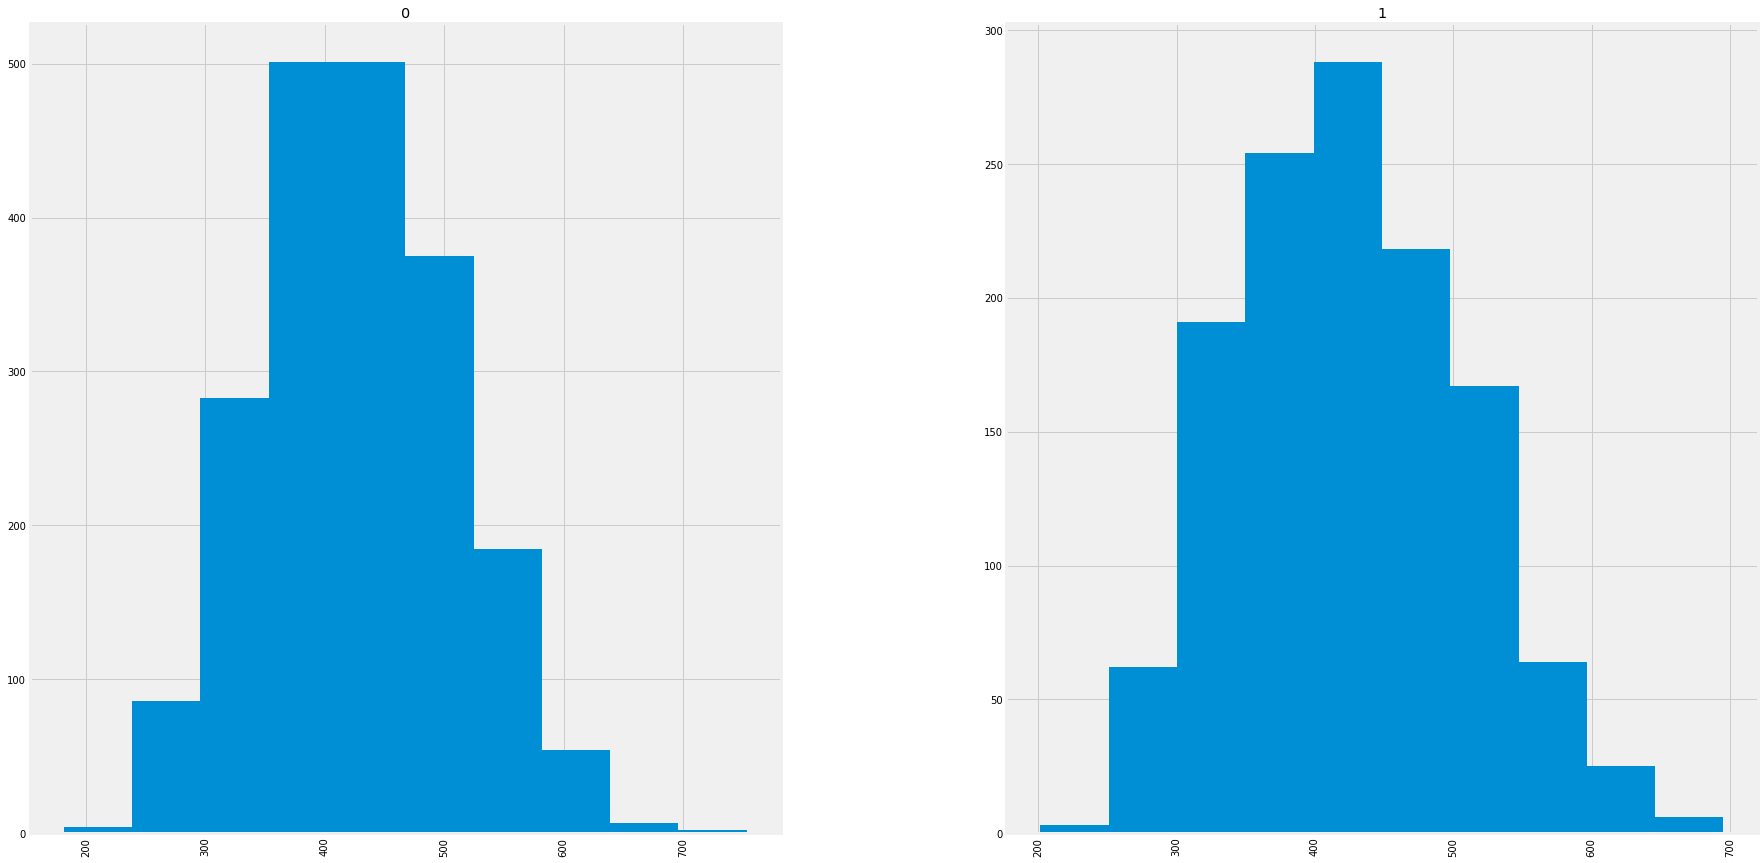

In [ ]:
df.hist(column='Conductivity', by='Potability')

####3.7) Organic carbon berdasarkan potability

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98f2298950>,
      dtype=object)

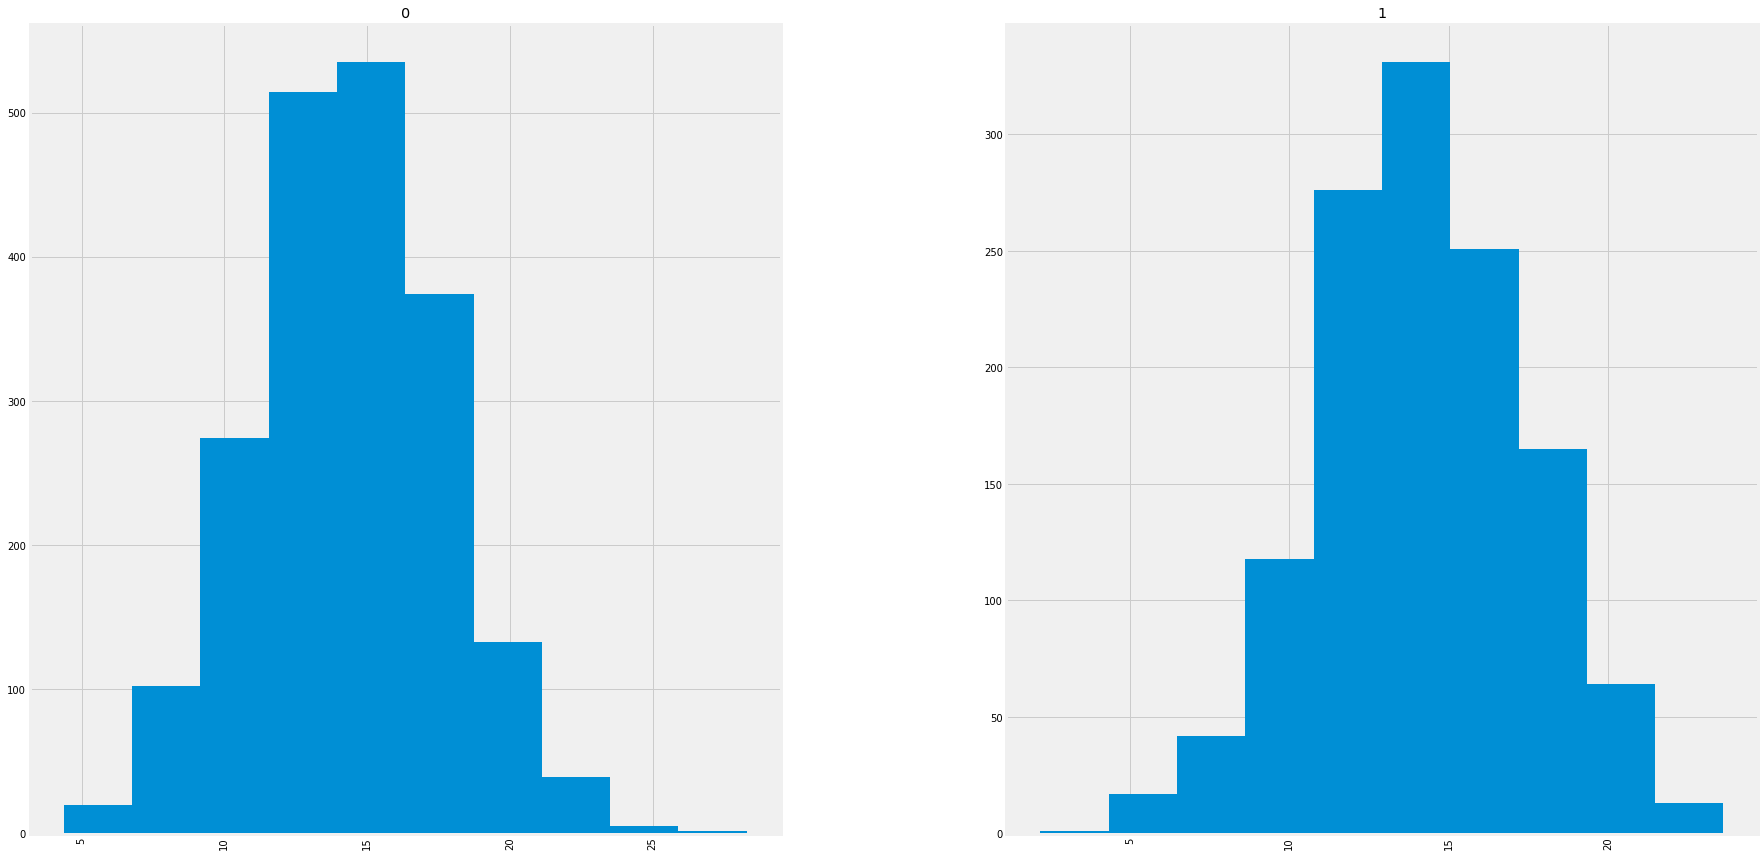

In [ ]:
df.hist(column='Organic_carbon', by='Potability')

####3.8) Trihalomethanes berdasarkan potability

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98f2957050>,
      dtype=object)

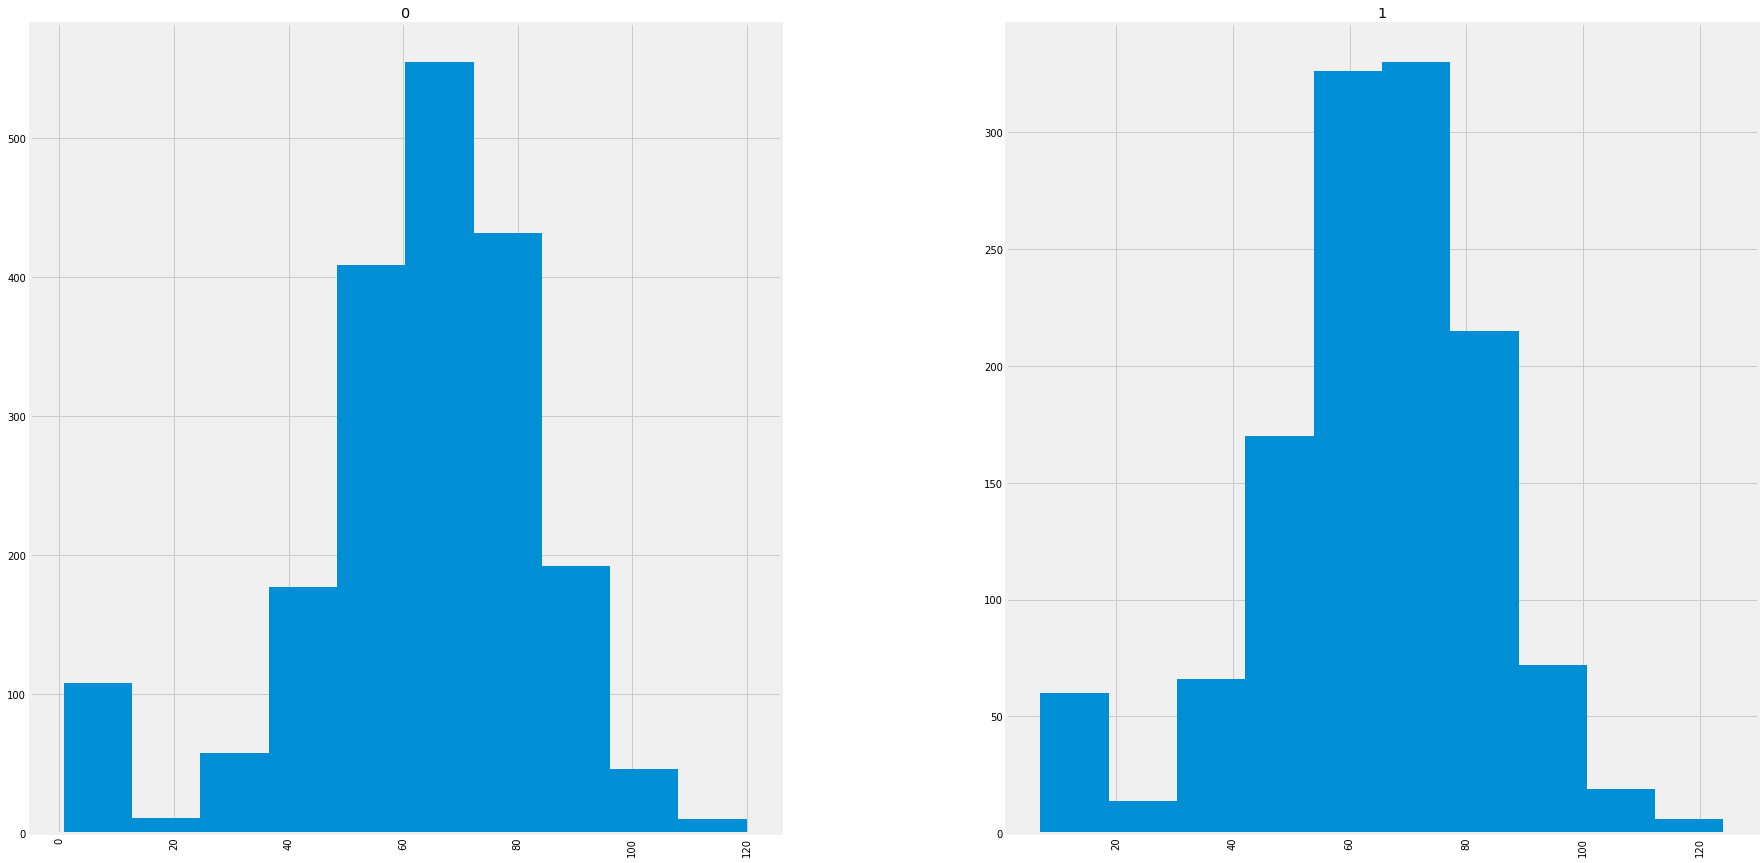

In [ ]:
df.hist(column='Trihalomethanes', by='Potability')

####3.9) Turbidity berdasarkan potability

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98f1f0ff10>,
      dtype=object)

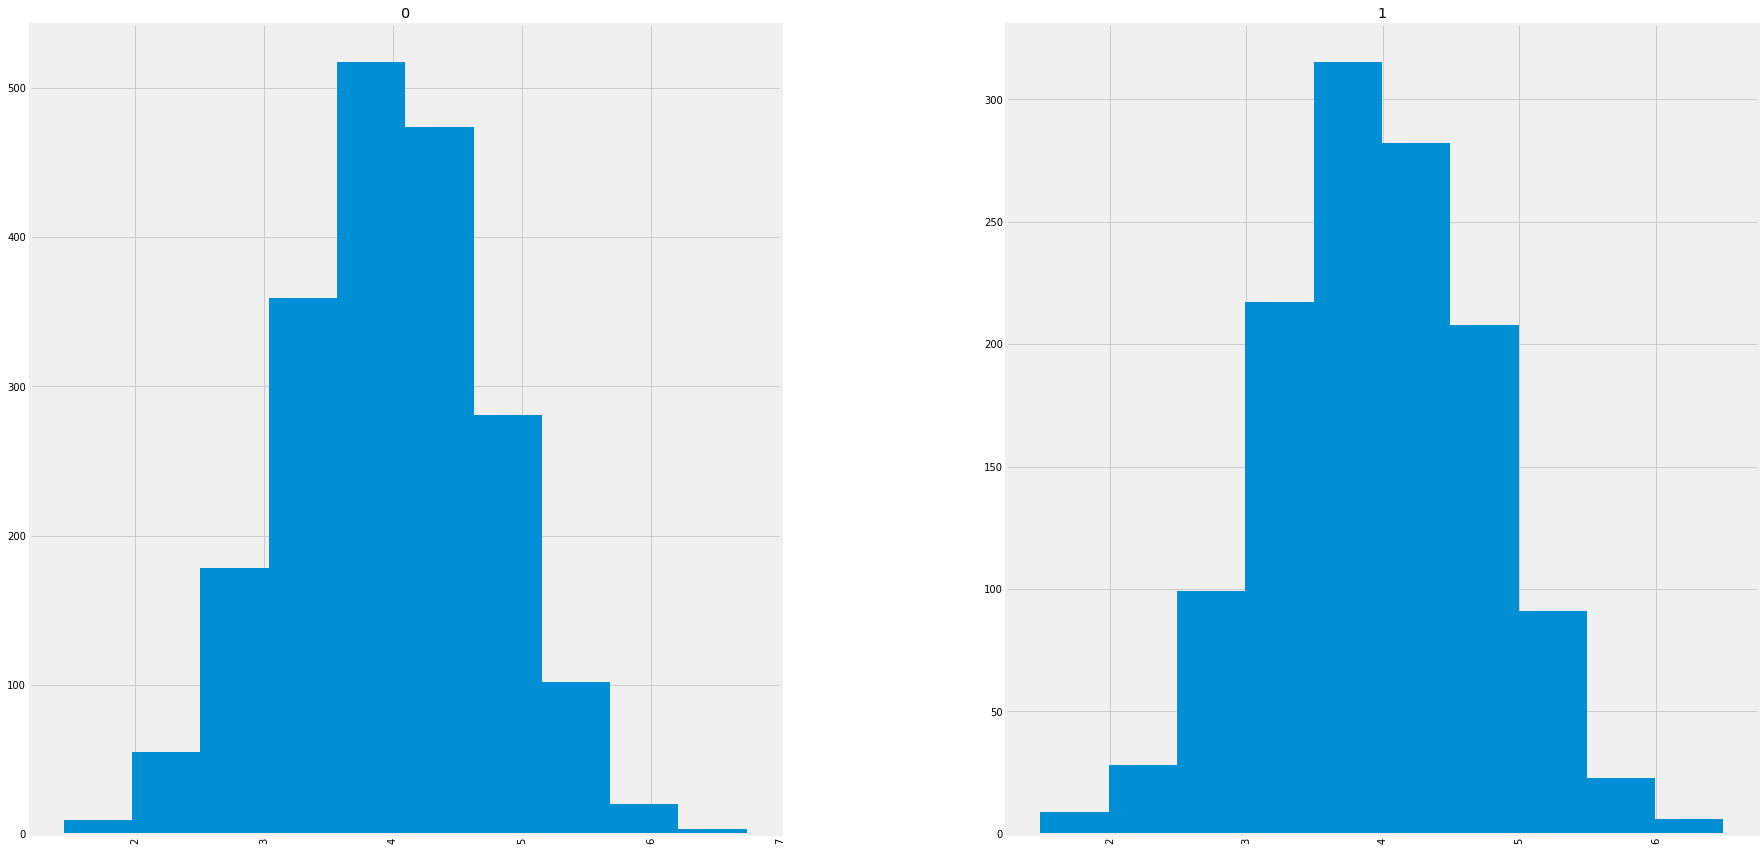

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98f1874750>,
      dtype=object)

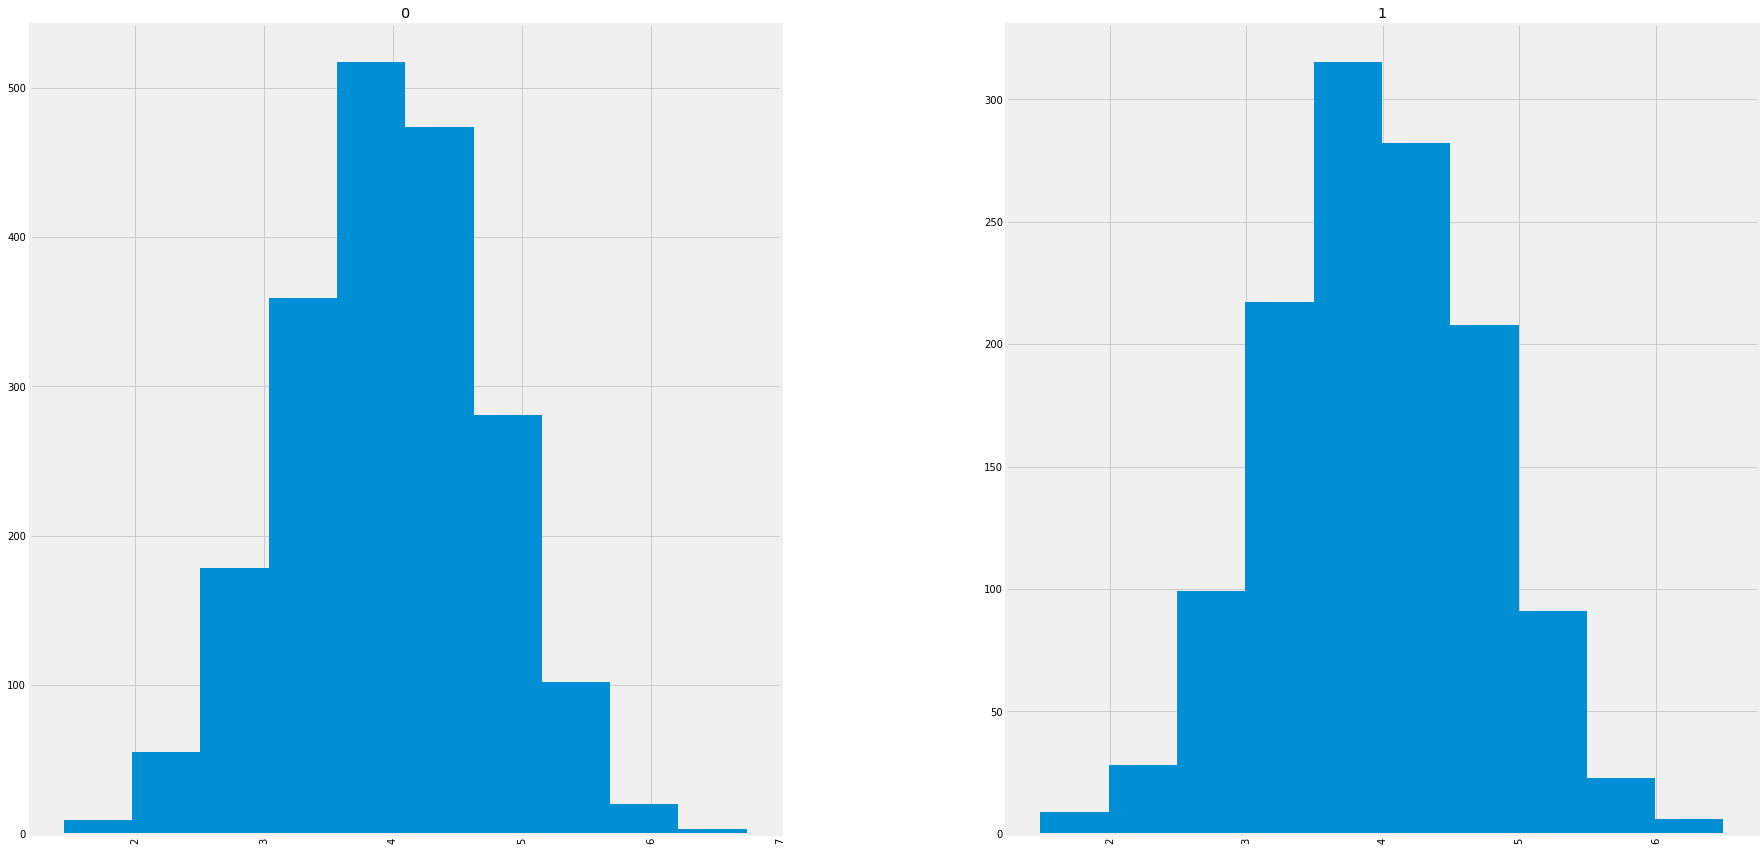

In [ ]:
df.hist(column='Turbidity', by='Potability')

> secara keseluruhan, tidak terdapat perbedaan yang begitu jauh pada bentuk distribsi masing-masing variabel berdasarkan potability

##Correlation

In [ ]:
df[numerical_features].corr().style.background_gradient(cmap='Blues')

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000


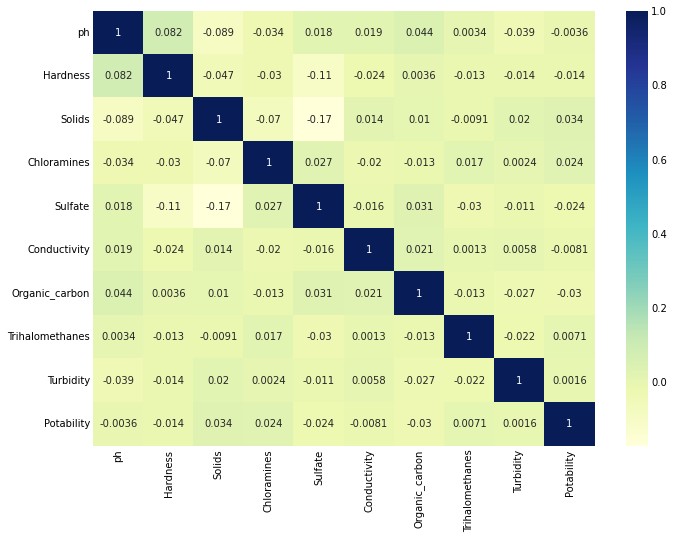

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='YlGnBu')

* Antar variabel memiliki hubungan yang lemah, hal ini terlihat dari nilai korelasi yang begitu kecil, bahkan dibawah 10%
*   korelasi terkuat yaitu antara "hardness" dan "ph", dengan korelasinya sebesar 8,2%


##Data Exploration pada data kategorik

In [ ]:
df[categorical_features].head()

,Potability
0,0
1,0
2,0
3,0
4,0


In [ ]:
df[categorical_features].tail()

,Potability
3271,1
3272,1
3273,1
3274,1
3275,1


###1) data unique

In [ ]:
df[categorical_features].nunique()

Potability    2
dtype: int64

###2) count masing-masing kategori

In [ ]:
for feature in categorical_features:
  print(df[feature].value_counts())

0    1998
1    1278
Name: Potability, dtype: int64


> terdapat 1998 data dengan kategory 0 (non potable) dan sebanyak 1278 kategory 1(potable)

###3) Bar chart 

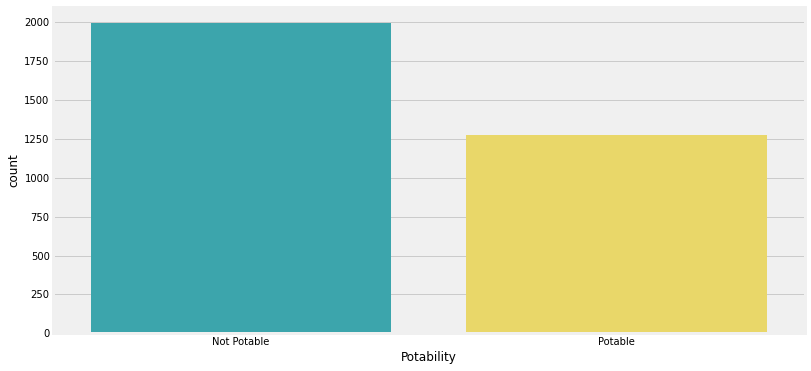

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(
    x='Potability',
    data=df,
    palette=['#29B5BF','#FFE653']

)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

> dari bar chart terlihat bahwa kategory 0 lebih banyak dibanding kategory 1. hasil tersebut sesuai dengan hasil pada summary statistics

##Missing values

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

> terdapat missing values pada data ph sebanyak 491 data, sulfate  sebanyak 781 data dan trihalomethnes sebanyak 162 data. 


In [ ]:
ph_mean=df['ph'].mean()
df['ph'].replace(np.nan,ph_mean, inplace=True)

##Mengatasi missing values

> **terdapat 3 cara untuk mengatasi missing values** : (1) Mengganti dengan angka, (2) Mengganti dengan nilai mean kolom yang terdapat missing value, (3) Menggunakan interpolasi.

> untuk kasus ini, kami menggunakan mean untuk mengatasi missing value

In [ ]:
sulfate_mean=df['ph'].mean()
df['ph'].replace(np.nan,sulfate_mean, inplace=True)

In [ ]:
sulfate_mean=df['Sulfate'].mean()
df['Sulfate'].replace(np.nan,sulfate_mean, inplace=True)

In [ ]:
trihalo_mean=df['ph'].mean()
df['Trihalomethanes'].replace(np.nan,trihalo_mean, inplace=True)

melakukan pengecekan kembali apakah masih terdapat missing values

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

> sekarang sudah tidak ada lagi missing values.
dari data yang sudah clean, coba dilakukan summary dan visualisasi lagi untuk melihat apakah dengan mengganti mean pada missing value akan berdampak pada summary statisticsnya

##Summary Statistics data tanpa missing values

In [ ]:
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.080795,1.469956,0.000000,6.277673,7.080795,7.870050,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.0,333.775777,36.142612,129.000000,317.094638,333.775777,350.385756,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.0,63.463109,20.349923,0.738000,53.793688,65.445962,76.666609,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


> terlihat bahwa tidak terjadi perubahan yang begitu besar antara sebelum dan sesudah dilakukan cleansing data, sehingga tidak merubah makna data asli.

## Data spliting

> ada tahap ini, akan dibagi dataset menjadi 3 set yaitu:

* training,
* dev, dan
* test set

dengan proporsi 90% : 5% : 5%

In [ ]:
#memisahkan data y sebagai target (potability) dan x
# Define variable X (Independent variable/features)
X = df.drop(columns=["Potability"]).copy()

# Define variable y (Dependent variable/Target variable)
y = df["Potability"].copy()

In [ ]:
# buat masing-masing set
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=.1, stratify=y, random_state=11)
X_dev, X_test, y_dev, y_test = train_test_split(X_rest, y_rest, test_size=.5, stratify=y_rest, random_state=11)

print(f"training size: {X_train.shape[0]} ({100*X_train.shape[0] / X.shape[0]:.3f}%)")
print(f"dev size: {X_dev.shape[0]} ({100*X_dev.shape[0] / X.shape[0]:.3f}%)")
print(f"test size: {X_test.shape[0]} ({100*X_test.shape[0] / X.shape[0]:.3f}%)")

training size: 2948 (89.988%)
dev size: 164 (5.006%)
test size: 164 (5.006%)


> Sehingga diperoleh:
* data training sebanyak **2,948** baris
* data development sebanyak **164** baris
* data test sebanyak **164** baris



bisa juga dibuat visualisasi distribusi target variabel `y` untuk masing-masing data

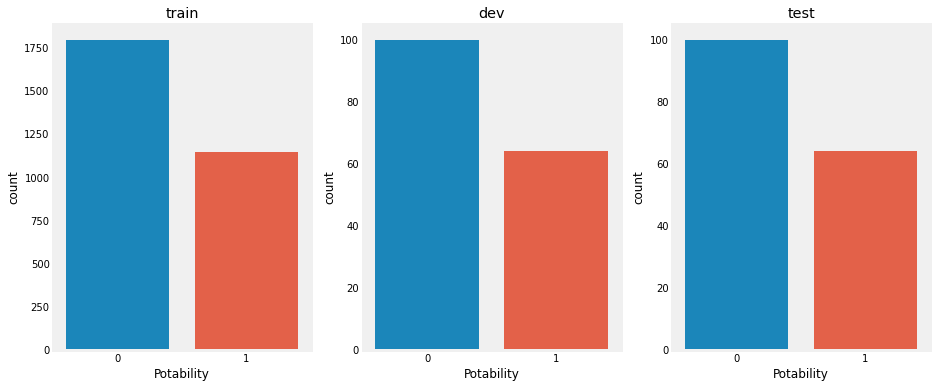

In [ ]:
#dalam bentuk visualisasi
fig, axis = plt.subplots(1, 3, figsize=(14, 6))
for idx, label in enumerate([
    (y_train, "train"), (y_dev, "dev"), (y_test, "test")
]):
    sns.countplot(x=label[0], ax=axis[idx])
    axis[idx].set_title(label[1])
    axis[idx].grid(False)
plt.show()

##Rescaling

> pada tahap ini akan menggunakan function `StandardScaler` dari `scikit-learn` sedemikian hingga nilai fitur-fitur numerik memiliki rata-rata 0 dan standar deviasi 1.

In [ ]:
# Panggil function StandardScaler dari package scikit-learn
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)
X_dev_scaled = pd.DataFrame(
    scaler.transform(X_dev),
    columns=X_dev.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

with pd.option_context("display.max_columns", None):
    display(X_train_scaled.head())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.362452,-0.000229,0.570285,0.157963,0.320901,-1.194768,-1.740247,-0.157628,-2.017839
1,1.500700,-0.107864,3.195256,-0.523729,0.005232,-0.746702,-0.018383,1.723261,-0.381101
2,-0.900444,-1.445935,1.176942,1.290556,-0.397595,-0.226301,-0.656646,-1.033821,-0.293098
3,1.180905,0.601690,0.573579,0.119749,0.005232,-0.518141,0.506054,0.755630,0.590001
4,-0.001708,-0.382375,-0.989607,1.341072,0.041610,0.508152,1.605655,0.816990,0.584153


#MODELING


* memilih jenis pemodelan 



* untuk modeling dari data quality water ini, kita akan menggunakan metode Classification dengan `DecisionTreeClassifier` dari `scikit-learn`. 

* Ada beberapa [(hyper)parameter] yang bisa kita tentukan saat mendefisinikan model.

* Sebagai awalan, kita akan menggunakan _default_ parameter yang disediakan oleh `scikit-learn` apa adanya.

In [ ]:
# Panggil function DecisionTreeClassifier() dari scikit-learn
model_default = DecisionTreeClassifier(random_state=11)

# Terapkan model tersebut menggunakan funciton fit() untuk membuat model berdasarkan set training
model_default.fit(X_train_scaled, y_train)

# Dengan menggunakan model yang sudah dibuat, hitung prediksi dengan menggunakan function predict() di tiap set
preds_train = model_default.predict(X_train_scaled)
preds_dev = model_default.predict(X_dev_scaled)
preds_test = model_default.predict(X_test_scaled)

In [ ]:
# training set
print("train prediction samples:\n", preds_train[:10])
print("train target samples:\n", y_train[:10].tolist())

train prediction samples:
 [0 1 1 0 0 0 0 0 0 1]
train target samples:
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 1]


In [ ]:
# development set
print("dev prediction samples:\n", preds_dev[:10])
print("dev target samples:\n", y_dev[:10].tolist())

dev prediction samples:
 [0 1 1 0 1 1 0 0 1 0]
dev target samples:
 [0, 1, 1, 1, 0, 1, 0, 0, 1, 1]


In [ ]:
# testing set
print("test prediction samples:\n", preds_test[:10])
print("test target samples:\n", y_test[:10].tolist())

test prediction samples:
 [0 1 0 0 0 0 0 0 1 1]
test target samples:
 [1, 1, 0, 0, 1, 1, 0, 1, 1, 0]


> Di tahap ini kita telah mendapatkan hasil prediksi menggunakan scikit-learn. Selanjutnya, kita akan coba buat model Decision Tree yang lebih sederhana dengan mengatur _(hyper)parameter_ yang ada.

In [ ]:
# Panggil function DecisionTreeClassifier() dari scikit-learn dan atur parameter
simpler_model = DecisionTreeClassifier(
    max_depth=7, min_samples_split=int(1e3),
    random_state=11
)
simpler_model.fit(X_train_scaled, y_train)

preds_train_simpler = simpler_model.predict(X_train_scaled)
preds_dev_simpler = simpler_model.predict(X_dev_scaled)
preds_test_simpler = simpler_model.predict(X_test_scaled)


> Kita bisa membuat visualisasi model Decision Tree yang sudah dilatih supaya kita bisa melihat bagaimana model bisa melakukan prediksi dan fitur-fitur mana yang menjadi root node ataupun decision node.

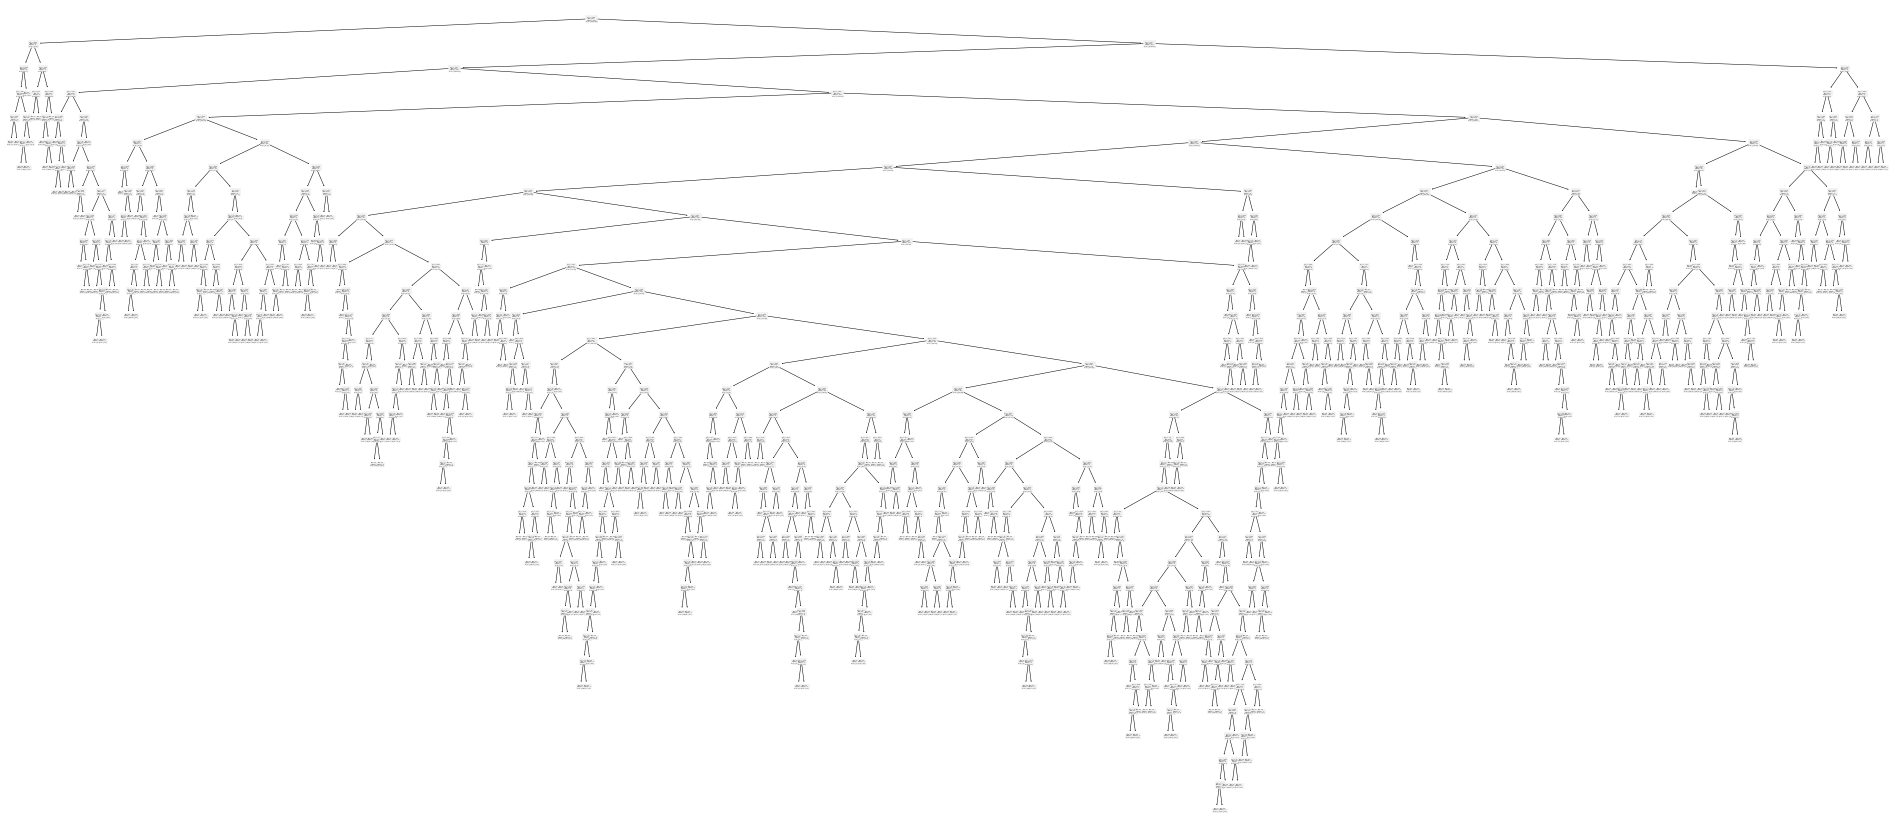

In [ ]:
# long running code with full depth
plot_tree(model_default)
plt.show()

> sekarang kita coba menggunakan simpler model dengan node defaultnya sebanyak 7

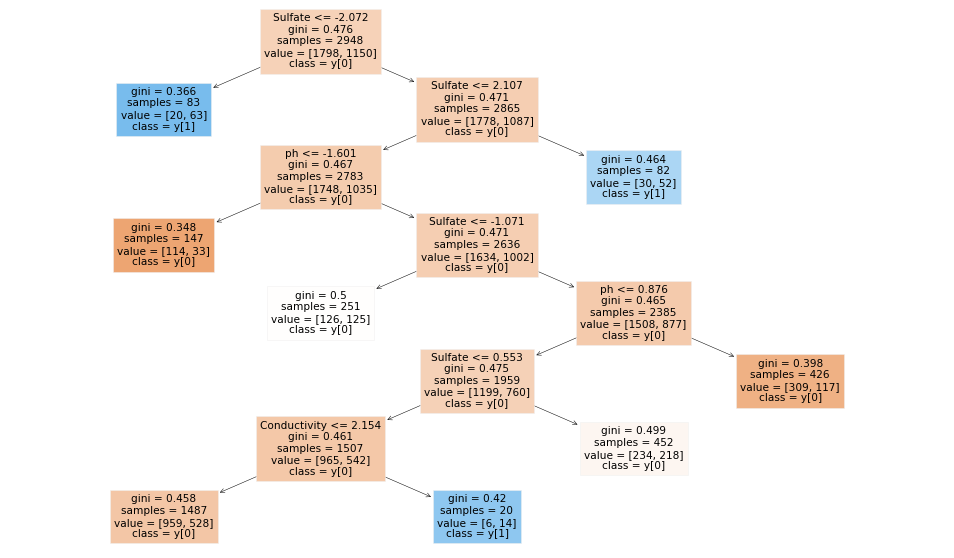

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(
    simpler_model,
    feature_names=simpler_model.feature_names_in_,
    class_names=True,
    filled=True,
)
plt.show()

> hasil klafikasi menggunakan default model dan simpler model begitu jauh. selisih node begitu besar. simpler model hanya bisa menampilkan node sebanyak 7 (secara default) namun pada default model, klasifikasi dilakukan sampai tuntas hingga menghasilkan puluhan nodes

#EVALUATION


*   seberapa baik hasilnya
*   apakah data memang cocok di analisis dengan model yang dipilih



> * Salah satu cara paling mudah untuk mengukur hasil prediksi suatu model klasifikasi adalah dengan melihat akurasi, yaitu perbandingan antara jumlah hasil prediksi tepat dengan jumlah total data yang ada. 
* Kita akan melihat berapa accuracy_score dari masing-masing model

##Akurasi Model

In [ ]:
# Terapkan function accuracy_score() pada masing-masing model
print(
    "Training accuracy on default model:",
    accuracy_score(y_train, preds_train)
)
print(
    "Training accuracy on simpler model:",
    accuracy_score(y_train, preds_train_simpler)
)
print()
print(
    "Dev accuracy on default model:",
    accuracy_score(y_dev, preds_dev)
)
print(
    "Dev accuracy on simpler model:",
    accuracy_score(y_dev, preds_dev_simpler)
)
print()
print(
    "Test accuracy on default model:",
    accuracy_score(y_test, preds_test)
)
print(
    "Test accuracy on simpler model:",
    accuracy_score(y_test, preds_test_simpler)
)

Training accuracy on default model: 1.0
Training accuracy on simpler model: 0.6346675712347354

Dev accuracy on default model: 0.5
Dev accuracy on simpler model: 0.5792682926829268

Test accuracy on default model: 0.6463414634146342
Test accuracy on simpler model: 0.5914634146341463


> Metrik lain yang sering digunakan adalah precision, recall, dan f1-score, dengan masing-masing rumusnya adalah sebagai berikut:

$$Precision =True Positiv/(True Positif+True Negarif)$$


> Dari semua kejadian yang kita prediksi positif, berapa yang memang benar-benar positif
$$Recall =True Positiv/(True Positif+False Negarif)$$


> Dari semua kejadian positif berapa yang kita prediksi dengan benar
$$F1 = 2X{(precision * recall)/(Precision + recall)}$$


> Sangat sulit untuk membandingkan dua model dengan tingkat precision rendah dan recall tinggi, atau sebaliknya. Jadi untuk membuatnya dapat dibandingkan, kita menggunakan F-Score. F-Score membantu kita untuk mengukur recall dan precision secara bersamaan.

##Precision score

In [ ]:
# Terapkan function precision_score pada masing-masing model

print(
    "Training precision on default model:",
    precision_score(y_train, preds_train, pos_label=1)
)
print(
    "Training precision on simpler model:",
    precision_score(y_train, preds_train_simpler, pos_label=1)
)
print()
print(
    "Dev precision on default model:",
    precision_score(y_dev, preds_dev, pos_label=1)
)
print(
    "Dev precision on simpler model:",
    precision_score(y_dev, preds_dev_simpler, pos_label=1)
)
print()
print(
    "Test precision on default model:",
    precision_score(y_test, preds_test, pos_label=1)
)
print(
    "Test precision on simpler model:",
    precision_score(y_test, preds_test_simpler, pos_label=1)
)

Training precision on default model: 1.0
Training precision on simpler model: 0.6972972972972973

Dev precision on default model: 0.375
Dev precision on simpler model: 0.2727272727272727

Test precision on default model: 0.5555555555555556
Test precision on simpler model: 0.3333333333333333


##Recall Score

In [ ]:
print(
    "Training recall on default model:",
    recall_score(y_train, preds_train, pos_label=1)
)
print(
    "Training recall on simpler model:",
    recall_score(y_train, preds_train_simpler, pos_label=1)
)
print()
print(
    "Dev recall on default model:",
    recall_score(y_dev, preds_dev, pos_label=1)
)
print(
    "Dev recall on simpler model:",
    recall_score(y_dev, preds_dev_simpler, pos_label=1)
)
print()
print(
    "Test recall on default model:",
    recall_score(y_test, preds_test, pos_label=1)
)
print(
    "Test recall on simpler model:",
    recall_score(y_test, preds_test_simpler, pos_label=1)
)

Training recall on default model: 1.0
Training recall on simpler model: 0.11217391304347826

Dev recall on default model: 0.421875
Dev recall on simpler model: 0.046875

Test recall on default model: 0.46875
Test recall on simpler model: 0.046875


> * Setelah kita bandingkan performa dari kedua model di atas untuk masing-masing metrik akurasi, precision, recall, dan juga f1-score, model yang bagus adalah dengan menggunakan default.

> *  Kita masih bisa mengeksplor hyperparameter dari model Decision Tree tersebut untuk mencari tahu konfigurasi yang paling bagus.


> Selain itu, untuk melihat visualisasi dan rangkuman dari performa model classification kita juga bisa menggunakan  _confusion matrix_ yang merupakan sebuah matriks/tabel yang terdiri dari report semua kemungkinan prediksi. 

> Ada 4 kemungkinan:
* **True Positive (TP)**: sampel yang sebenarnya True/1 berhasil diprediksi oleh model sebagai True/Positive
* **True Negative (TN)**: sample yang sebenarnya False/0 berhasil diprediksi oleh model sebagai False/0
* **False Positive (FP)**: sampel yang sebenarnya False/0, tapi diprediksi oleh model sebagai True/1
* **False Negative (FN)**: sampel yang sebenarnya True/1, tapi diprediksi oleh model sebagai False/0

###*1) Classification Report & Confusion Matrix: Default model and Simpler model on training data set*

Default model performance on training set..
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1798
           1       1.00      1.00      1.00      1150

    accuracy                           1.00      2948
   macro avg       1.00      1.00      1.00      2948
weighted avg       1.00      1.00      1.00      2948



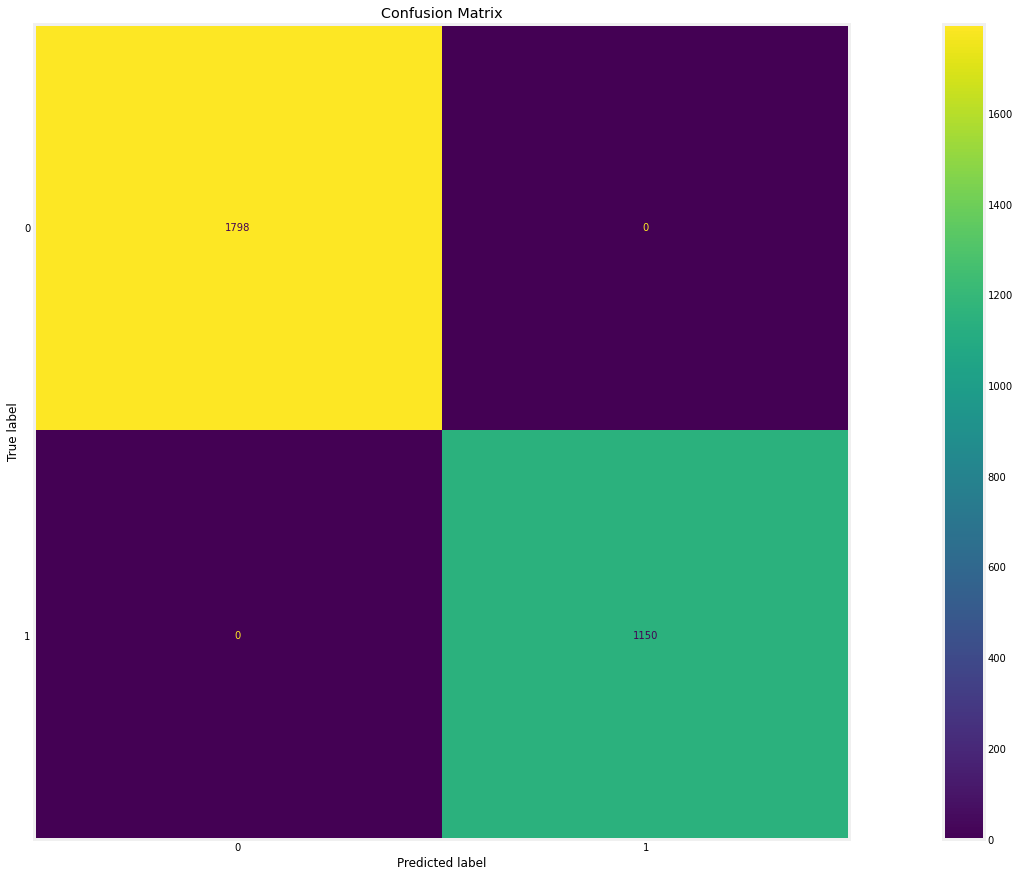

Simpler model performance on training set..
              precision    recall  f1-score   support

           0       0.63      0.97      0.76      1798
           1       0.70      0.11      0.19      1150

    accuracy                           0.63      2948
   macro avg       0.66      0.54      0.48      2948
weighted avg       0.66      0.63      0.54      2948



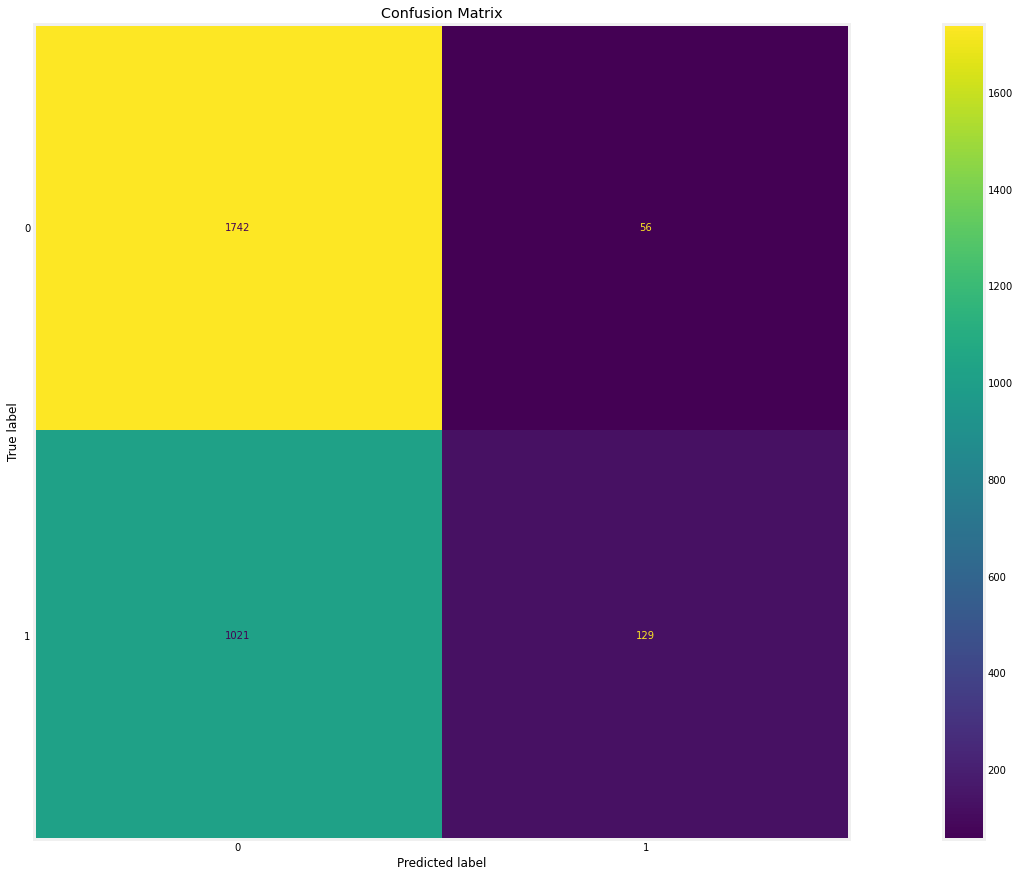

In [ ]:
print("Default model performance on training set..")
print(classification_report(y_train, preds_train))

# Visualisasikan Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, preds_train)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

print("Simpler model performance on training set..")
print(classification_report(y_train, preds_train_simpler))

# Visualisasikan Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, preds_train_simpler)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

> * dari **default model**, semua **evaluation metrics sangat perfect**, mulai dari **accuracy**, **precision**, **recall**, dan **f1-score**
* dari **1,150 data yang berlabel `1`**, model gagal memprediksi **0 data** dengan benar (**false negative**). 

###*2) Classification Report & Confusion Matrix:  Default model and Simpler model on dev data set*

Default model performance on dev set...
              precision    recall  f1-score   support

           0       0.60      0.55      0.57       100
           1       0.38      0.42      0.40        64

    accuracy                           0.50       164
   macro avg       0.49      0.49      0.48       164
weighted avg       0.51      0.50      0.50       164



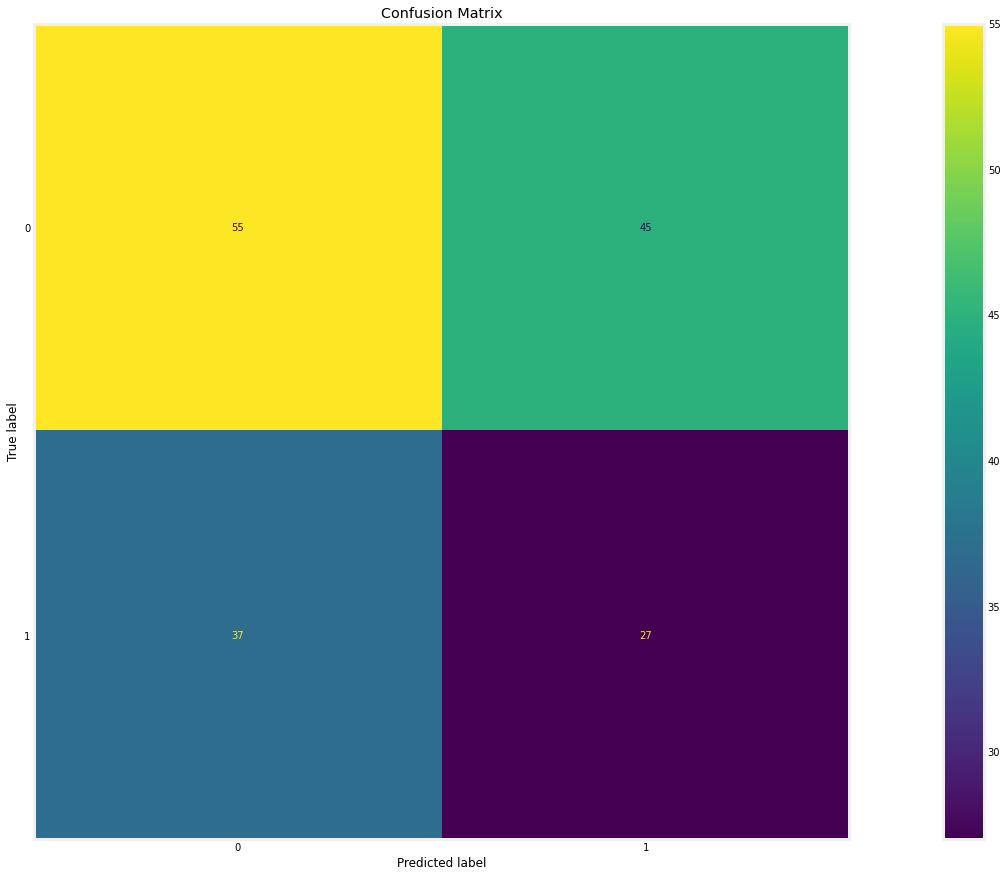

Simpler model performance on dev set...
              precision    recall  f1-score   support

           0       0.60      0.92      0.73       100
           1       0.27      0.05      0.08        64

    accuracy                           0.58       164
   macro avg       0.44      0.48      0.40       164
weighted avg       0.47      0.58      0.47       164



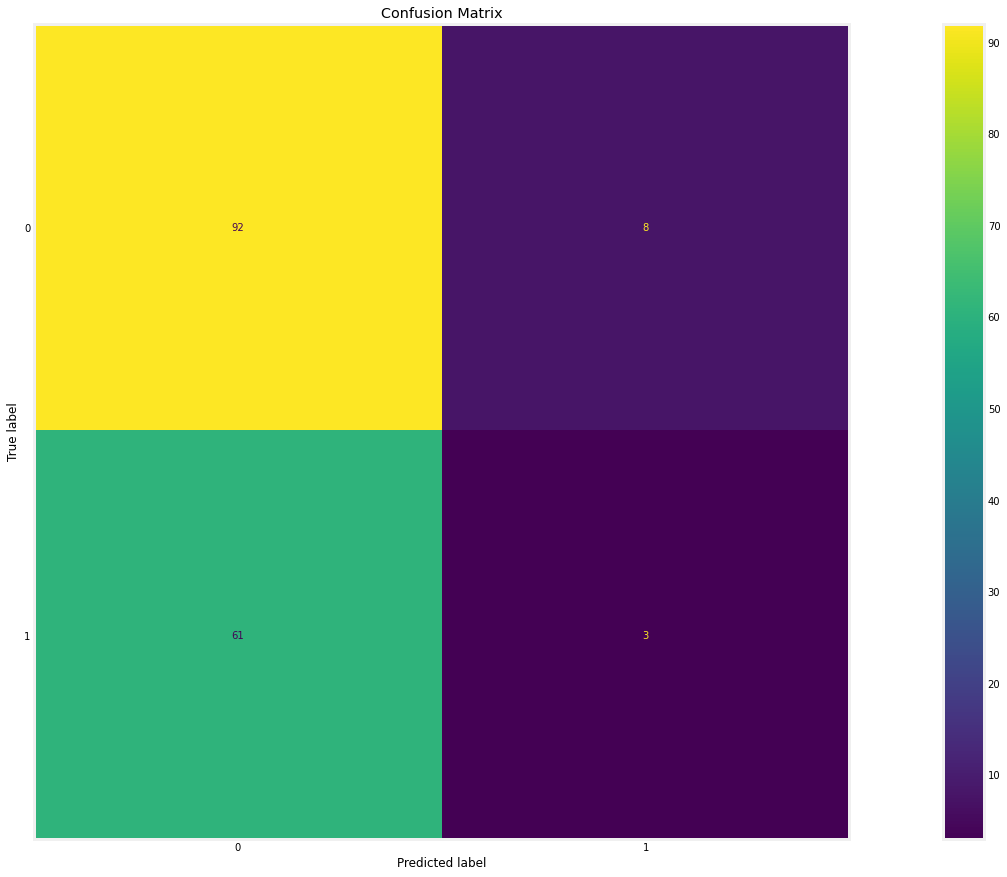

In [ ]:
print("Default model performance on dev set...")
print(classification_report(y_dev, preds_dev))

# Visualisasikan Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_dev, preds_dev)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

print("Simpler model performance on dev set...")
print(classification_report(y_dev, preds_dev_simpler))

# Visualisasikan Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_dev, preds_dev_simpler)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

> * dari **default model**, semua **evaluation metrics hampir mendekati bagus (mendekati 60%)* **, mulai dari **accuracy**, **precision**, **recall**, dan **f1-score**
* dari **64 data yang berlabel `1`**, model gagal memprediksi **37 data** dengan benar (**false negative**). Ini berarti, ada **37** air yang seharusnya potable (layak dijadikan air minum), tapi model mengklasifikan  sebagai non potable (tidak layak minum).


> * hasil degan menggunakan **simpler model**, menghasilkan **evaluation metrics** yang lebih bagus dibanding menggunakan **default model**, namun selisihnya tidak begitu besar dibandingkan pada evaluasi model pada data training.
* dari **64 data yang berlabel `1`**, model gagal memprediksi **61 data** dengan benar (**False negatif**).


###*3) Classification Report & Confusion Matrix:  Default model and Simpler model on test data set*

Default model performance on test set...
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       100
           1       0.56      0.47      0.51        64

    accuracy                           0.65       164
   macro avg       0.62      0.61      0.62       164
weighted avg       0.64      0.65      0.64       164



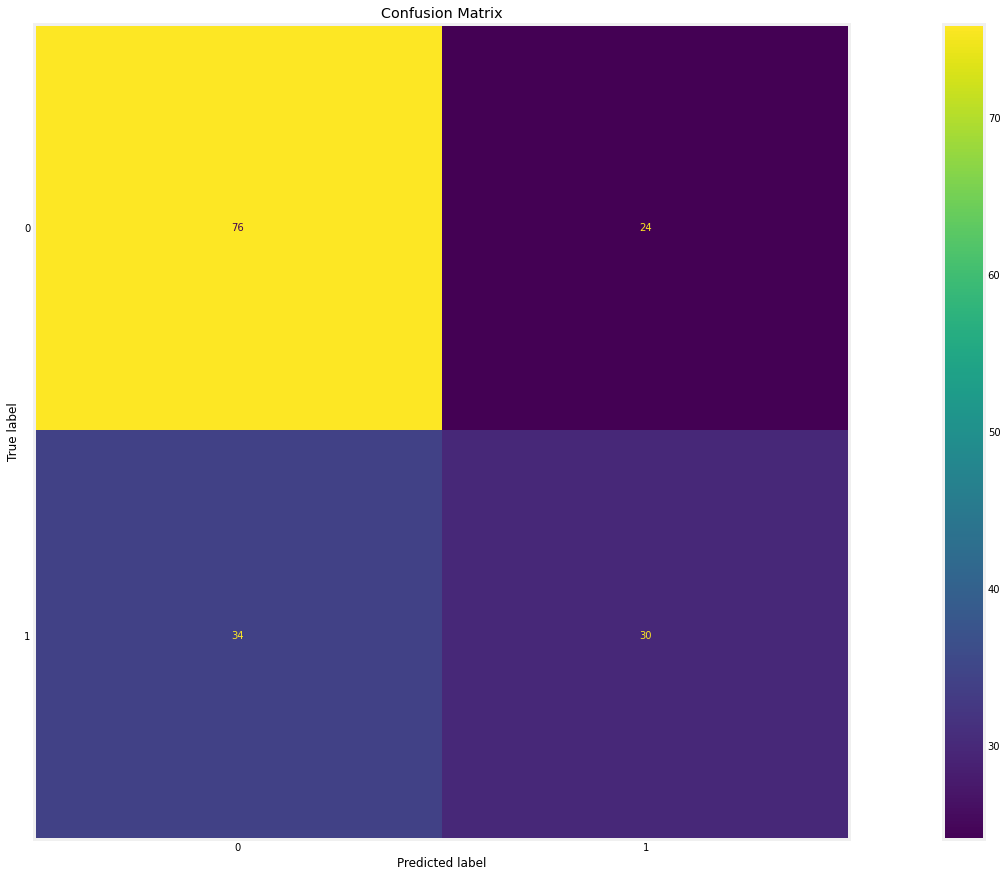

Simpler model performance on test set...
              precision    recall  f1-score   support

           0       0.61      0.94      0.74       100
           1       0.33      0.05      0.08        64

    accuracy                           0.59       164
   macro avg       0.47      0.49      0.41       164
weighted avg       0.50      0.59      0.48       164



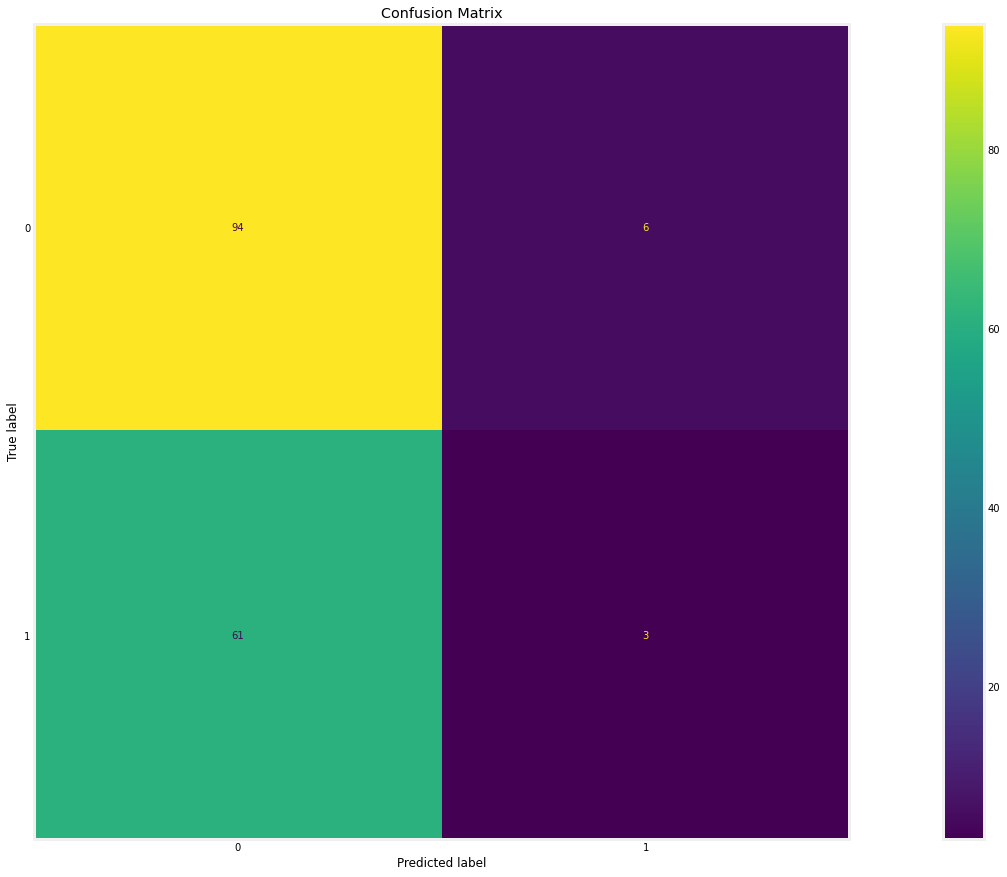

In [ ]:
print("Default model performance on test set...")
print(classification_report(y_test, preds_test))

# Visualisasikan Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, preds_test)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

print("Simpler model performance on test set...")
print(classification_report(y_test, preds_test_simpler))

# Visualisasikan Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, preds_test_simpler)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

> * dari **default model**, semua **evaluation metrics sudah bagus (diatas 60%)**, mulai dari **accuracy**, **precision**, **recall**, dan **f1-score**
* dari **64 data yang berlabel `1`**, model gagal memprediksi **34 data** dengan benar (**false negative**). Ini berarti, ada **24** air yang seharusnya potable (layak dijadikan air minum), tapi model mengklasifikan  sebagai non potable (tidak layak minum).


> * hasil degan menggunakan **simpler model**, menghasilkan **evaluation metrics (f1 dan recall)** yang lebih bagus dibanding menggunakan **default model**, namun pada tingkat akurasi, default model menghasilkan nilai yang lebih besar dibanding simpler model. default model memili akurasi 65% sedangkan simpler model 59%.
* dari **64 data yang berlabel `1`**, model gagal memprediksi **61 data** dengan benar (**False negatif**).


> **kesimpulan yang dapat diambil dari hasil evaluasi kedua model diatas adalah:**

* kesalahan memprediksi data berlabel `1` pada default model lebih sedikit dibanding simpler model.

* model default lebih akurat dibanding model  yang dibuktikan dari nilai akurasi model default (65%) > akurasi simpler model (59%), walaupun masih terdapat nilai metrics evaluation dari simpler model yang lebih besar dibanding model default. 

* dilihat dari besar nilai akurasinya yaitu 65%, data kualitas air ini sudah cukup bagus/akurat jika dimodelkan  menggunakan `Decision tree`, namun tidak menutup kemungkinan bahwa modeling lain akan menghasilkan nilai yang lebih bagus lagi.



#DEPLOYMENT

##Exporting Result

> Sebagai penutup, kita bisa melakukan prediksi untuk seluruh data dan menyimpan hasil prediksi menjadi sebuah file CSV seperti berikut.

In [ ]:
column_names = (
    numerical_features
    +categorical_features
 )


X_processed = pd.concat(
    [
     # numerical features
     X[numerical_features].reset_index(drop=True),
     
    ],
    axis=1
)
X_processed_scaled = pd.DataFrame(
    scaler.transform(X_processed),
    columns=X_processed.columns
)

print("Predicting all {} data..".format(X_processed_scaled.shape[0]))
preds_full = model_default.predict(X_processed_scaled)

print("Combine the prediction back to the original data..")
X = X.assign(prediction=preds_full)

print("Overview of the resulting data..")
with pd.option_context("display.max_columns", None):
    display(X.head())

print("\n Export to CSV..")
X.to_csv("prediction.csv", index=False)

print("Done!")

Predicting all 3276 data..
Combine the prediction back to the original data..
Overview of the resulting data..


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,prediction
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,1
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0



 Export to CSV..
Done!
